In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os,sys
#https://stackoverflow.com/questions/32085531/importing-a-csv-file-into-python-to-make-scatterplots-and-histograms

In [2]:
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [20]:
df  = pd.read_csv("/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbonds/delta_scores_most_improved.csv")

In [21]:
#this crashes with how big the dataframe is with the open options
df

file_initial  \
0       /scratch/abgvg9/discovery_results/top_1000_placement/9967/placements/7l1u_receptor_only_PV-006690566647_9_1.pdb   
1      /scratch/abgvg9/discovery_results/top_1000_placement/7742/placements/7l1u_receptor_only_PV-000579798243_13_1.pdb   
2      /scratch/abgvg9/discovery_results/top_1000_placement/7742/placements/7l1u_receptor_only_PV-000579798243_13_1.pdb   
3      /scratch/abgvg9/discovery_results/top_1000_placement/7742/placements/7l1u_receptor_only_PV-000579798243_13_1.pdb   
4      /scratch/abgvg9/discovery_results/top_1000_placement/7742/placements/7l1u_receptor_only_PV-000579798243_13_1.pdb   
...                                                                                                                 ...   
38335          /scratch/abgvg9/discovery_results/top_1000_placement/0/placements/7l1u_receptor_only_Z1638711304_5_4.pdb   
38336          /scratch/abgvg9/discovery_results/top_1000_placement/0/placements/7l1u_receptor_only_Z1638711304_5_4.pdb   
38337          /scratch/abgvg9/discovery_results/top_1000_placement/0/placements/7l1u_receptor_only_Z1638711304_5_4.pdb   
38338          /scratch/abgvg9/discovery_results/top_1000_placement/0/placements/7l1u_receptor_only_Z1638711304_5_4.pdb   
38339          /scratch/abgvg9/discovery_results/top_1000_placement/0/placements/7l1u_receptor_only_Z1638711304_5_4.pdb   

                                                                                                                                                                                         file_compare  \
0        /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbonds/PV-006690566647/placements/7l1u_receptor_only_PV-006690566647_1_0.pdb   
1      /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbonds/PV-000579798243/placements/7l1u_receptor_only_PV-000579798243_117_0.pdb   
2      /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbonds/PV-000579798243/placements/7l1u_receptor_only_PV-000579798243_228_2.pdb   
3      /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbonds/PV-000579798243/placements/7l1u_receptor_only_PV-000579798243_186_1.pdb   
4       /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbonds/PV-000579798243/placements/7l1u_receptor_only_PV-000579798243_15_1.pdb   
...                                                                                                                                                                                               ...   
38335           /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbonds/Z1638711304/placements/7l1u_receptor_only_Z1638711304_48_7.pdb   
38336          /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbonds/Z1638711304/placements/7l1u_receptor_only_Z1638711304_126_0.pdb   
38337           /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbonds/Z1638711304/placements/7l1u_receptor_only_Z1638711304_19_3.pdb   
38338           /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbonds/Z1638711304/placements/7l1u_receptor_only_Z1638711304_46_2.pdb   
38339           /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbonds/Z1638711304/placements/7l1u_receptor_only_Z1638711304_19_2.pdb   

       ddg_initial  ddg_compare  ddg_delta  total_motifs_initial  \
0       -15.774856    -9.804307  -5.970549                   6.0   
1       -12.166059   -13.020303   0.854244                   6.0   
2       -12.1

In [22]:
#get rid of weird 0 ddg values
df = df[df['ddg_compare'] != 0]

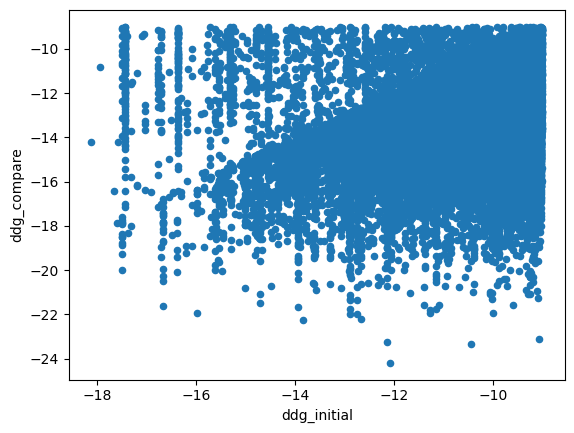

In [23]:
df.plot(kind='scatter',x='ddg_initial',y='ddg_compare')
plt.show()

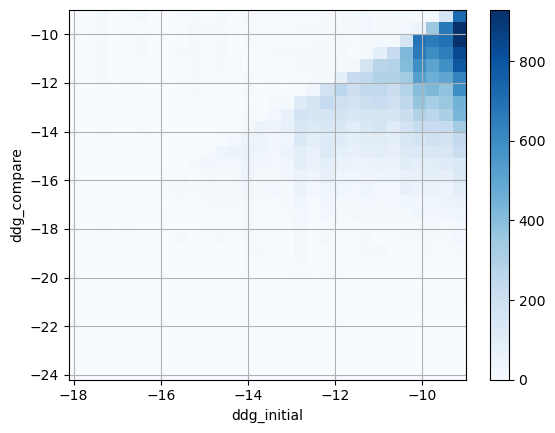

In [24]:
#Create heatmap of rmsds per system (n=85) between AutoDock and Rosetta Motifs
#Expanding x and y max to 10
#Using Blues color scale to allow for zeros to be white

x = df['ddg_initial']
y = df['ddg_compare']

heatmap, xedges, yedges = np.histogram2d(x, y, bins=(30, 30))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.xlabel('ddg_initial')
plt.ylabel('ddg_compare')

plt.imshow(heatmap.T, extent=extent, origin='lower', cmap='Blues', aspect='auto')

plt.colorbar()

plt.grid(True)
plt.show()

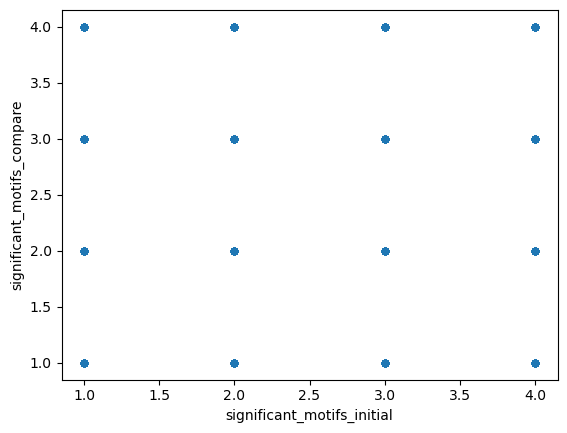

In [25]:
df.plot(kind='scatter',x='significant_motifs_initial',y='significant_motifs_compare')
plt.show()

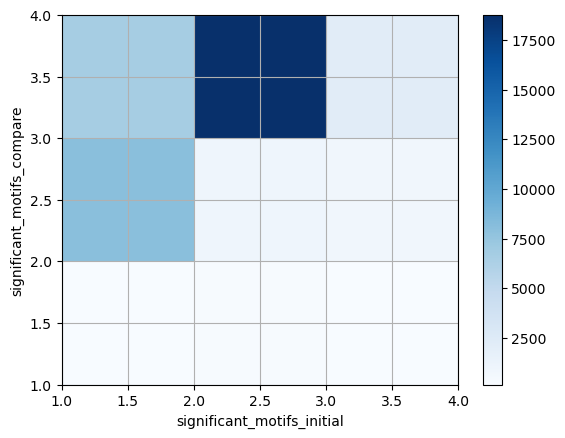

In [26]:
#Create heatmap of rmsds per system (n=85) between AutoDock and Rosetta Motifs
#Expanding x and y max to 10
#Using Blues color scale to allow for zeros to be white

x = df['significant_motifs_initial']
y = df['significant_motifs_compare']

heatmap, xedges, yedges = np.histogram2d(x, y, bins=(3, 3))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.xlabel('significant_motifs_initial')
plt.ylabel('significant_motifs_compare')

plt.imshow(heatmap.T, extent=extent, origin='lower', cmap='Blues', aspect='auto')

plt.colorbar()

plt.grid(True)
plt.show()

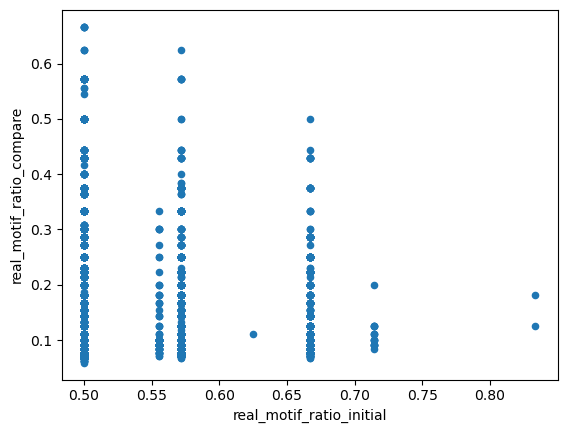

In [27]:
df.plot(kind='scatter',x='real_motif_ratio_initial',y='real_motif_ratio_compare')
plt.show()

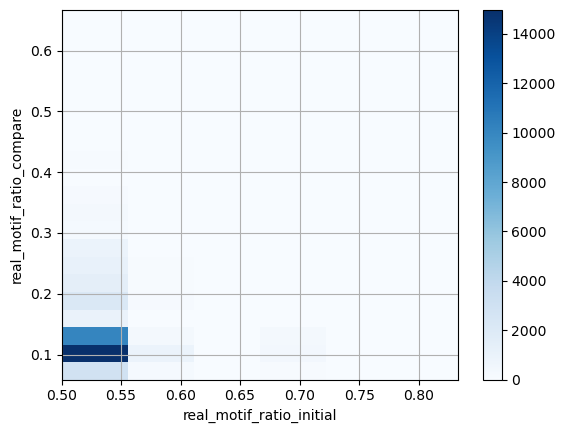

In [28]:
#Create heatmap of rmsds per system (n=85) between AutoDock and Rosetta Motifs
#Expanding x and y max to 10
#Using Blues color scale to allow for zeros to be white

x = df['real_motif_ratio_initial']
y = df['real_motif_ratio_compare']

heatmap, xedges, yedges = np.histogram2d(x, y, bins=(6, 21))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.xlabel('real_motif_ratio_initial')
plt.ylabel('real_motif_ratio_compare')

plt.imshow(heatmap.T, extent=extent, origin='lower', cmap='Blues', aspect='auto')

plt.colorbar()

plt.grid(True)
plt.show()

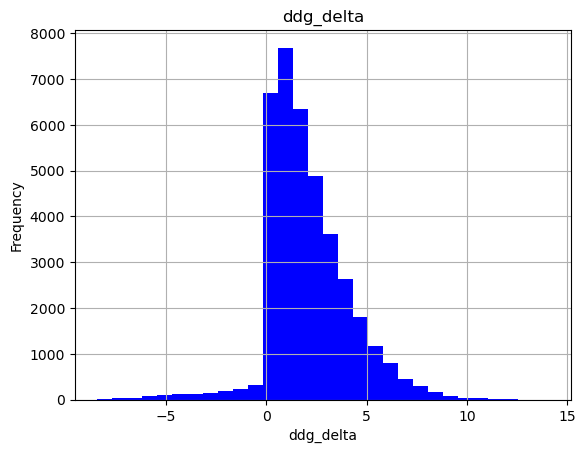

In [29]:
#plot the delta ddg in histogram
x = df['ddg_delta']
#set labels and title
plt.xlabel('ddg_delta')
plt.ylabel('Frequency')
plt.title('ddg_delta')
#create 30 bin 1D hsitogram
plt.hist(x, bins=30, color='blue')
#set grid
plt.grid(True)
#show plot
plt.show()

In [30]:
#read in the general csv too
#df_general  = pd.read_csv("/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbonds/delta_scores.csv")

In [3]:
#read in the general csv too
df_general  = pd.read_csv("/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/delta_scores_real_and_hbond.csv")

In [4]:
#get rid of weird 0 ddg values
df_general = df_general[df_general['ddg_compare'] != 0]

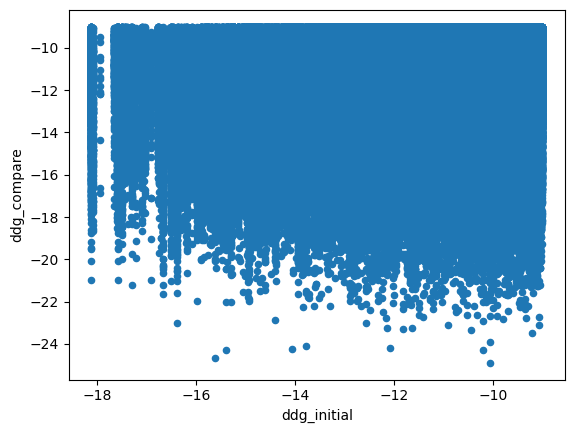

In [35]:
df_general.plot(kind='scatter',x='ddg_initial',y='ddg_compare')
plt.show()

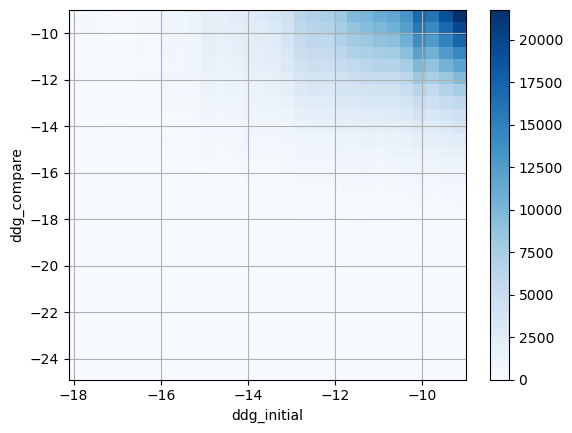

In [36]:
#Create heatmap of rmsds per system (n=85) between AutoDock and Rosetta Motifs
#Expanding x and y max to 10
#Using Blues color scale to allow for zeros to be white

x = df_general['ddg_initial']
y = df_general['ddg_compare']

heatmap, xedges, yedges = np.histogram2d(x, y, bins=(30, 30))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.xlabel('ddg_initial')
plt.ylabel('ddg_compare')

plt.imshow(heatmap.T, extent=extent, origin='lower', cmap='Blues', aspect='auto')

plt.colorbar()

plt.grid(True)
plt.show()

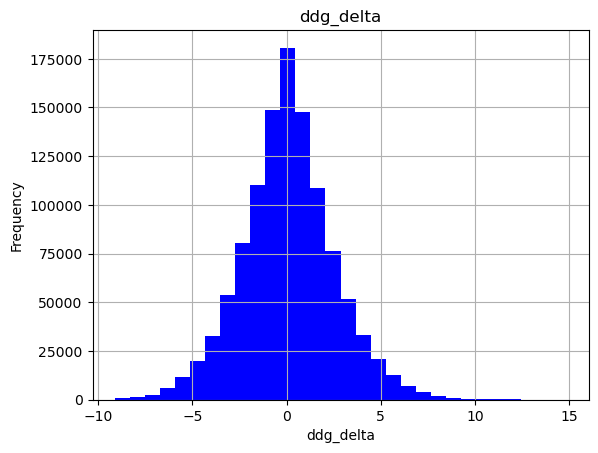

In [37]:
#plot the delta ddg in histogram
x = df_general['ddg_delta']
#set labels and title
plt.xlabel('ddg_delta')
plt.ylabel('Frequency')
plt.title('ddg_delta')
#create 30 bin 1D hsitogram
plt.hist(x, bins=30, color='blue')
#set grid
plt.grid(True)
#show plot
plt.show()

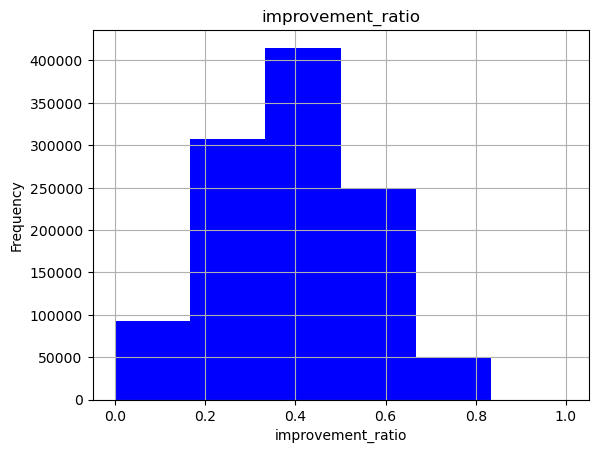

In [38]:
#plot the delta ddg in histogram
x = df_general['improvement_ratio']
#set labels and title
plt.xlabel('improvement_ratio')
plt.ylabel('Frequency')
plt.title('improvement_ratio')
#create 30 bin 1D hsitogram
plt.hist(x, bins=6, color='blue')
#set grid
plt.grid(True)
#show plot
plt.show()

In [39]:
#filter down the general dataframe to only include placements where they meet the following criteria:
#rmsd < 6
#ddg_delta is positive
#real motif ratio is >= 0.5
#at least 3 rosetta hbonds
#ddg < -15
#
#
#

df_general_filtered = df_general[(df_general['hbond_motif_count_compare'] >= 3) & (df_general['rmsd'] <= 6) & (df_general['real_motif_ratio_compare'] >= 0.5) & (df_general['ddg_delta'] > -100) & (df_general['ddg_compare'] <= -7)]

In [40]:
df_general_filtered

file_initial  \
128754    /scratch/abgvg9/discovery_results/top_1000_placement/139/placements/7l1u_receptor_only_PV-002519747256_10_10.pdb   
142839      /scratch/abgvg9/discovery_results/top_1000_placement/569/placements/7l1u_receptor_only_PV-003178192738_3_0.pdb   
144806      /scratch/abgvg9/discovery_results/top_1000_placement/627/placements/7l1u_receptor_only_PV-003287776297_4_0.pdb   
145452     /scratch/abgvg9/discovery_results/top_1000_placement/670/placements/7l1u_receptor_only_PV-003369841292_12_0.pdb   
145496     /scratch/abgvg9/discovery_results/top_1000_placement/670/placements/7l1u_receptor_only_PV-003369841292_12_0.pdb   
145510     /scratch/abgvg9/discovery_results/top_1000_placement/670/placements/7l1u_receptor_only_PV-003369841292_12_0.pdb   
156556      /scratch/abgvg9/discovery_results/top_1000_placement/422/placements/7l1u_receptor_only_PV-004119480788_7_0.pdb   
156575      /scratch/abgvg9/discovery_results/top_1000_placement/422/placements/7l1u_receptor_only_PV-004119480788_7_0.pdb   
160609    /scratch/abgvg9/discovery_results/top_1000_placement/1498/placements/7l1u_receptor_only_PV-004308931941_12_2.pdb   
160801    /scratch/abgvg9/discovery_results/top_1000_placement/1498/placements/7l1u_receptor_only_PV-004308931941_12_1.pdb   
181264    /scratch/abgvg9/discovery_results/top_1000_placement/2061/placements/7l1u_receptor_only_PV-004719922396_11_0.pdb   
188581      /scratch/abgvg9/discovery_results/top_1000_placement/302/placements/7l1u_receptor_only_PV-004999431600_1_9.pdb   
189177      /scratch/abgvg9/discovery_results/top_1000_placement/302/placements/7l1u_receptor_only_PV-004999431600_1_9.pdb   
190390      /scratch/abgvg9/discovery_results/top_1000_placement/134/placements/7l1u_receptor_only_PV-005016473339_2_3.pdb   
190866      /scratch/abgvg9/discovery_results/top_1000_placement/134/placements/7l1u_receptor_only_PV-005016473339_2_3.pdb   
190885      /scratch/abgvg9/discovery_results/top_1000_placement/134/placements/7l1u_receptor_only_PV-005016473339_2_3.pdb   
191086      /scratch/abgvg9/discovery_results/top_1000_placement/134/placements/7l1u_receptor_only_PV-005016473339_2_3.pdb   
191189      /scratch/abgvg9/discovery_results/top_1000_placement/134/placements/7l1u_receptor_only_PV-005016473339_2_3.pdb   
198492     /scratch/abgvg9/discovery_results/top_1000_placement/682/placements/7l1u_receptor_only_PV-005185091470_15_3.pdb   
205746      /scratch/abgvg9/discovery_results/top_1000_placement/971/placements/7l1u_receptor_only_PV-005380309509_4_1.pdb   
235139    /scratch/abgvg9/discovery_results/top_1000_placement/1225/placements/7l1u_receptor_only_PV-006196339992_10_1.pdb   
235306    /scratch/abgvg9/discovery_results/top_1000_placement/1225/placements/7l1u_receptor_only_PV-006196339992_10_1.pdb   
246929     /scratch/abgvg9/discovery_results/top_1000_placement/1298/placements/7l1u_receptor_only_PV-006431194402_1_3.pdb   
254363    /scratch/abgvg9/discovery_results/top_1000_placement/2674/placements/7l1u_receptor_only_PV-006560833559_11_0.pdb   
437133    /scratch/abgvg9/discovery_results/top_1000_placement/5441/placements/7l1u_receptor_only_PV-006636311993_12_1.pdb   
615380     /scratch/abgvg9/discovery_results/top_1000_placement/7665/placements/7l1u_receptor_only_PV-006662965996_8_6.pdb   
665935     /scratch/abgvg9/discovery_results/top_1000_placement/8239/placements/7l1u_receptor_only_PV-006669822259_4_2.pdb   
688847     /scratch/abgvg9/discovery_results/top_1000_placement/8534/placements/7l1u_receptor_only_PV-006673381756_6_1.pdb   
688896     /scratch/abgvg9/discovery_results/top_1000_placement/8534/placements/7l1u_receptor_only_PV-006673381756_6_1.pdb   
788837    /scratch/abgvg9/discovery_results/top_1000_placement/9795/placements/7l1u_receptor_only_PV-006688498702_11_0.pdb   
941077   /scratch/abgvg9/discovery_results/top_1000_placement/11872/placements/7l1u_receptor_only_PV-006713619448_15_1.pdb   
955251         /scratch/abgvg9/discovery_results/top_1000_placement/1813/place

In [41]:
len(df_general_filtered)

39

In [42]:
#filter down the general dataframe to only include placements where they meet the following criteria:
#rmsd < 6
#ddg_delta is positive
#real motif ratio is >= 0.5
#at least 3 rosetta hbonds
#ddg < -15
#
#
#

df_general_filtered_lite = df_general[(df_general['real_motif_ratio_compare'] >= 0.5)]

In [43]:
df_general_filtered_lite

file_initial  \
2441      /scratch/abgvg9/discovery_results/top_1000_placement/6877/placements/7l1u_receptor_only_PV-000240150258_5_3.pdb   
3577     /scratch/abgvg9/discovery_results/top_1000_placement/6921/placements/7l1u_receptor_only_PV-000260603577_14_0.pdb   
4157     /scratch/abgvg9/discovery_results/top_1000_placement/11208/placements/7l1u_receptor_only_PV-000265999639_1_2.pdb   
4626     /scratch/abgvg9/discovery_results/top_1000_placement/11208/placements/7l1u_receptor_only_PV-000265999639_1_2.pdb   
4628     /scratch/abgvg9/discovery_results/top_1000_placement/11208/placements/7l1u_receptor_only_PV-000265999639_1_2.pdb   
...                                                                                                                   ...   
1115403        /scratch/abgvg9/discovery_results/top_1000_placement/2744/placements/7l1u_receptor_only_Z929537814_2_1.pdb   
1115922        /scratch/abgvg9/discovery_results/top_1000_placement/2744/placements/7l1u_receptor_only_Z929537814_2_1.pdb   
1117559         /scratch/abgvg9/discovery_results/top_1000_placement/25/placements/7l1u_receptor_only_Z942155802_10_8.pdb   
1117677         /scratch/abgvg9/discovery_results/top_1000_placement/25/placements/7l1u_receptor_only_Z942155802_10_8.pdb   
1117943       /scratch/abgvg9/discovery_results/top_1000_placement/1861/placements/7l1u_receptor_only_Z993458444_12_2.pdb   

                                                                                                                                                                                           file_compare  \
2441       /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbonds/PV-000240150258/placements/7l1u_receptor_only_PV-000240150258_3_0.pdb   
3577      /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbonds/PV-000260603577/placements/7l1u_receptor_only_PV-000260603577_62_0.pdb   
4157     /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbonds/PV-000265999639/placements/7l1u_receptor_only_PV-000265999639_118_6.pdb   
4626      /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbonds/PV-000265999639/placements/7l1u_receptor_only_PV-000265999639_49_9.pdb   
4628      /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbonds/PV-000265999639/placements/7l1u_receptor_only_PV-000265999639_28_8.pdb   
...                                                                                                                                                                                                 ...   
1115403             /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbonds/Z929537814/placements/7l1u_receptor_only_Z929537814_41_4.pdb   
1115922             /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbonds/Z929537814/placements/7l1u_receptor_only_Z929537814_94_5.pdb   
1117559             /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbonds/Z942155802/placements/7l1u_receptor_only_Z942155802_58_5.pdb   
1117677            /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbonds/Z942155802/placements/7l1u_receptor_only_Z942155802_179_3.pdb   
1117943            /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbonds/Z993458444/placements/7l1u_receptor_only_Z993458444_186_1.pdb   

         ddg_initial  ddg_compare  ddg_delta  total_motifs_initial  \
2441       -9.399038   -10.160470   0.761432                   6.0   
3577      -12.760182   -12.4130

In [44]:
len(df_general_filtered_lite)

2813

In [45]:
#get a count on the number of placements that are very close to the original placement
df_recoveries = df_general

#get rid of weird 0 ddg values
df_recoveries = df_recoveries[df_recoveries['ddg_compare'] != 0]

df_recoveries = df_recoveries[df_recoveries['rmsd'] < 1]

In [46]:
len(df_recoveries)

11984

In [47]:
#aggregate by file_initial
closest_recovery_general_df = df_general.loc[df_general.groupby('file_initial')['rmsd'].idxmin()]

In [48]:
len(closest_recovery_general_df)

3096

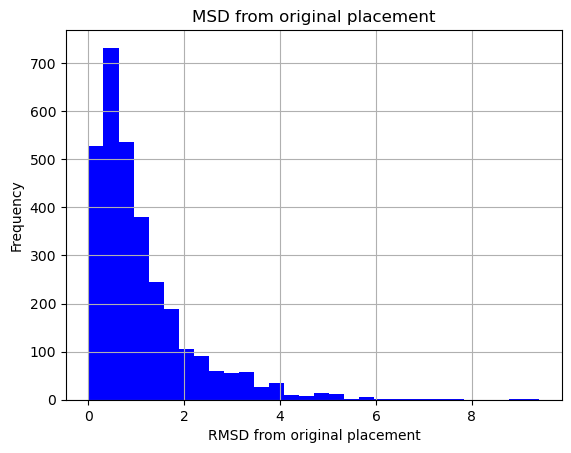

In [49]:
#plot the delta ddg in histogram
x = closest_recovery_general_df['rmsd']
#set labels and title
plt.xlabel('RMSD from original placement')
plt.ylabel('Frequency')
plt.title('MSD from original placement')
#create 30 bin 1D hsitogram
plt.hist(x, bins=30, color='blue')
#set grid
plt.grid(True)
#show plot
plt.show()

In [50]:
systems_with_a_close_recovery_df = closest_recovery_general_df[closest_recovery_general_df['ddg_compare'] != 0]
systems_with_a_close_recovery_df = systems_with_a_close_recovery_df[systems_with_a_close_recovery_df['rmsd'] < 4]
len(systems_with_a_close_recovery_df)

3033

In [51]:
len(systems_with_a_close_recovery_df)/len(closest_recovery_general_df)

0.9796511627906976

In [52]:
systems_with_a_close_recovery_df

file_initial  \
993071           /scratch/abgvg9/discovery_results/top_1000_placement/0/placements/7l1u_receptor_only_Z1638711304_5_4.pdb   
1100893          /scratch/abgvg9/discovery_results/top_1000_placement/1/placements/7l1u_receptor_only_Z4665830190_3_0.pdb   
1109923           /scratch/abgvg9/discovery_results/top_1000_placement/1/placements/7l1u_receptor_only_Z741169262_3_2.pdb   
1101985        /scratch/abgvg9/discovery_results/top_1000_placement/100/placements/7l1u_receptor_only_Z5042978486_5_0.pdb   
210285    /scratch/abgvg9/discovery_results/top_1000_placement/1000/placements/7l1u_receptor_only_PV-005473709931_3_3.pdb   
...                                                                                                                   ...   
802643    /scratch/abgvg9/discovery_results/top_1000_placement/9979/placements/7l1u_receptor_only_PV-006690711690_5_0.pdb   
802741   /scratch/abgvg9/discovery_results/top_1000_placement/9987/placements/7l1u_receptor_only_PV-006690805801_12_1.pdb   
803128   /scratch/abgvg9/discovery_results/top_1000_placement/9992/placements/7l1u_receptor_only_PV-006690874138_13_6.pdb   
25348     /scratch/abgvg9/discovery_results/top_1000_placement/9993/placements/7l1u_receptor_only_PV-000591476649_9_2.pdb   
803162   /scratch/abgvg9/discovery_results/top_1000_placement/9996/placements/7l1u_receptor_only_PV-006690902801_14_1.pdb   

                                                                                                                                                                                           file_compare  \
993071            /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbonds/Z1638711304/placements/7l1u_receptor_only_Z1638711304_39_5.pdb   
1100893            /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbonds/Z4665830190/placements/7l1u_receptor_only_Z4665830190_3_0.pdb   
1109923             /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbonds/Z741169262/placements/7l1u_receptor_only_Z741169262_19_2.pdb   
1101985          /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbonds/Z5042978486/placements/7l1u_receptor_only_Z5042978486_185_0.pdb   
210285   /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbonds/PV-005473709931/placements/7l1u_receptor_only_PV-005473709931_126_3.pdb   
...                                                                                                                                                                                                 ...   
802643   /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbonds/PV-006690711690/placements/7l1u_receptor_only_PV-006690711690_192_0.pdb   
802741    /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbonds/PV-006690805801/placements/7l1u_receptor_only_PV-006690805801_83_1.pdb   
803128    /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbonds/PV-006690874138/placements/7l1u_receptor_only_PV-006690874138_35_1.pdb   
25348     /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbonds/PV-000591476649/placements/7l1u_receptor_only_PV-000591476649_53_1.pdb   
803162     /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbonds/PV-006690902801/placements/7l1u_receptor_only_PV-006690902801_5_2.pdb   

         ddg_initial  ddg_compare  ddg_delta  total_motifs_initial  \
993071    -10.362272   -11.747045   1.384773                   6.0   
1100893    -9.616098    -9.7890

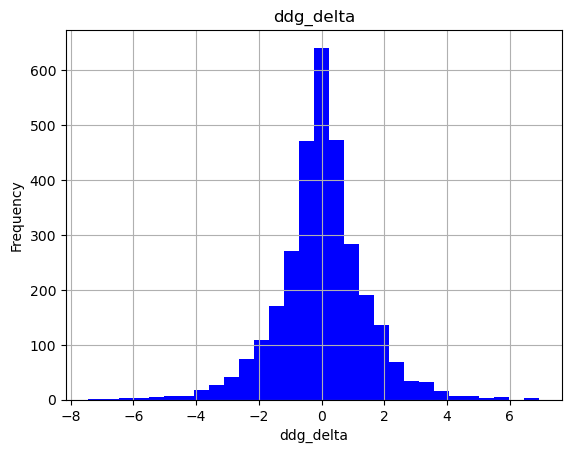

In [53]:
#plot the delta ddg in histogram
x = closest_recovery_general_df['ddg_delta']
#set labels and title
plt.xlabel('ddg_delta')
plt.ylabel('Frequency')
plt.title('ddg_delta')
#create 30 bin 1D hsitogram
plt.hist(x, bins=30, color='blue')
#set grid
plt.grid(True)
#show plot
plt.show()

In [54]:
#grab the systems that did not recover and take a look
systems_without_a_close_recovery_df = closest_recovery_general_df[closest_recovery_general_df['ddg_compare'] != 0]
systems_without_a_close_recovery_df = systems_without_a_close_recovery_df[systems_without_a_close_recovery_df['rmsd'] > 4]
len(systems_without_a_close_recovery_df)

63

In [55]:
len(systems_without_a_close_recovery_df)/len(closest_recovery_general_df)

0.020348837209302327

In [56]:
systems_without_a_close_recovery_df

file_initial  \
1029157          /scratch/abgvg9/discovery_results/top_1000_placement/0/placements/7l1u_receptor_only_Z2228465286_7_1.pdb   
813358   /scratch/abgvg9/discovery_results/top_1000_placement/10137/placements/7l1u_receptor_only_PV-006692604822_7_1.pdb   
815053   /scratch/abgvg9/discovery_results/top_1000_placement/10192/placements/7l1u_receptor_only_PV-006693256199_3_0.pdb   
819733   /scratch/abgvg9/discovery_results/top_1000_placement/10293/placements/7l1u_receptor_only_PV-006694498724_4_1.pdb   
141095     /scratch/abgvg9/discovery_results/top_1000_placement/107/placements/7l1u_receptor_only_PV-003068151636_2_0.pdb   
...                                                                                                                   ...   
4919      /scratch/abgvg9/discovery_results/top_1000_placement/9496/placements/7l1u_receptor_only_PV-000266492250_5_1.pdb   
769573    /scratch/abgvg9/discovery_results/top_1000_placement/9511/placements/7l1u_receptor_only_PV-006685076331_7_1.pdb   
770957    /scratch/abgvg9/discovery_results/top_1000_placement/9529/placements/7l1u_receptor_only_PV-006685304605_8_1.pdb   
770956    /scratch/abgvg9/discovery_results/top_1000_placement/9529/placements/7l1u_receptor_only_PV-006685304605_9_0.pdb   
787593    /scratch/abgvg9/discovery_results/top_1000_placement/9789/placements/7l1u_receptor_only_PV-006688417137_1_0.pdb   

                                                                                                                                                                                           file_compare  \
1029157            /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbonds/Z2228465286/placements/7l1u_receptor_only_Z2228465286_1_4.pdb   
813358     /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbonds/PV-006692604822/placements/7l1u_receptor_only_PV-006692604822_1_4.pdb   
815053     /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbonds/PV-006693256199/placements/7l1u_receptor_only_PV-006693256199_1_2.pdb   
819733   /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbonds/PV-006694498724/placements/7l1u_receptor_only_PV-006694498724_104_0.pdb   
141095    /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbonds/PV-003068151636/placements/7l1u_receptor_only_PV-003068151636_77_0.pdb   
...                                                                                                                                                                                                 ...   
4919     /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbonds/PV-000266492250/placements/7l1u_receptor_only_PV-000266492250_164_5.pdb   
769573    /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbonds/PV-006685076331/placements/7l1u_receptor_only_PV-006685076331_17_0.pdb   
770957     /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbonds/PV-006685304605/placements/7l1u_receptor_only_PV-006685304605_1_0.pdb   
770956     /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbonds/PV-006685304605/placements/7l1u_receptor_only_PV-006685304605_1_1.pdb   
787593   /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbonds/PV-006688417137/placements/7l1u_receptor_only_PV-006688417137_154_0.pdb   

         ddg_initial  ddg_compare  ddg_delta  total_motifs_initial  \
1029157    -9.792328    -9.120679  -0.671649                   6.0   
813358    -10.499441   -10.3823

In [57]:
#get close rmsd placements with overall improvements
df_general_complete_improvements = df_general[(df_general['rmsd'] <= 6) & (df_general['improvement_ratio'] >= 1)]
len(df_general_complete_improvements)
df_general_complete_improvements

file_initial  \
718431   /scratch/abgvg9/discovery_results/top_1000_placement/8894/placements/7l1u_receptor_only_PV-006677705714_6_1.pdb   
1104789       /scratch/abgvg9/discovery_results/top_1000_placement/463/placements/7l1u_receptor_only_Z5052318887_9_0.pdb   

                                                                                                                                                                                          file_compare  \
718431   /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbonds/PV-006677705714/placements/7l1u_receptor_only_PV-006677705714_76_3.pdb   
1104789         /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbonds/Z5052318887/placements/7l1u_receptor_only_Z5052318887_217_8.pdb   

         ddg_initial  ddg_compare  ddg_delta  total_motifs_initial  \
718431     -9.517598   -12.797166   3.279568                   6.0   
1104789   -12.033836   -14.998518   2.964682                   6.0   

         total_motifs_compare  total_motifs_delta  significant_motifs_initial  \
718431                    7.0                -1.0                         1.0   
1104789                   7.0                -1.0                         2.0   

         significant_motifs_compare  significant_motifs_delta  \
718431                          2.0                      -1.0   
1104789                         3.0                      -1.0   

         real_motif_ratio_initial  real_motif_ratio_compare  \
718431                        0.5                  0.571429   
1104789                       0.5                  0.571429   

         real_motif_ratio_delta  hbond_motif_count_initial  \
718431                -0.071429                          1   
1104789               -0.071429                          1   

         hbond_motif_count_compare  hbond_motif_count_delta  \
718431                           2                     -1.0   
1104789                          2                     -1.0   

         hbond_motif_energy_sum_initial  hbond_motif_energy_sum_compare  \
718431                        -1.035912                       -0.970559   
1104789                       -1.069960                       -0.981634   

         hbond_motif_energy_sum_delta  closest_autodock_recovery_rmsd_initial  \
718431                      -0.065353                                1.826579   
1104789                     -0.088326                                1.994308   

         closest_autodock_recovery_rmsd_compare  \
718431                                      100   
1104789                                     100   

         closest_autodock_recovery_rmsd_delta  \
718431                             -98.173421   
1104789                            -98.005692   

         closest_autodock_recovery_ddg_initial  \
718431                                    -7.3   
1104789                                   -8.7   

         closest_autodock_recovery_ddg_compare  \
718431                                       0   
1104789                                      0   

         closest_autodock_recovery_ddg_delta  strain_energy_initial  \
718431                                  -7.3               4.666938   
1104789                                 -8.7               1.951141   

         strain_energy_compare  strain_energy_delta  total_initial  \
718431                       0             4.666938      -2.859992   
1104789                      0             1.951141      -8.358346   

         total_compare  total_delta      rmsd  improvement_ratio  Unnamed: 34  
718431       97.803704  -100.663696  1.893268                1.0          NaN  
1104789      96.591277  -104.949623  2.104119                1.0          NaN

In [63]:
#get close rmsd placements with overall improvements
df_general_0_8_improvements = df_general[(df_general['rmsd'] <= 6) & (df_general['improvement_ratio'] >= 0.8)]
len(df_general_0_8_improvements)
df_general_0_8_improvements

file_initial  \
628        /scratch/abgvg9/discovery_results/top_1000_placement/7494/placements/7l1u_receptor_only_PV-000233470341_5_10.pdb   
1339     /scratch/abgvg9/discovery_results/top_1000_placement/11974/placements/7l1u_receptor_only_PV-000233470449_13_13.pdb   
1622     /scratch/abgvg9/discovery_results/top_1000_placement/11974/placements/7l1u_receptor_only_PV-000233470449_13_13.pdb   
2017       /scratch/abgvg9/discovery_results/top_1000_placement/11327/placements/7l1u_receptor_only_PV-000239407773_4_0.pdb   
2023       /scratch/abgvg9/discovery_results/top_1000_placement/11327/placements/7l1u_receptor_only_PV-000239407773_4_0.pdb   
...                                                                                                                     ...   
1117760           /scratch/abgvg9/discovery_results/top_1000_placement/25/placements/7l1u_receptor_only_Z942155802_10_8.pdb   
1117958         /scratch/abgvg9/discovery_results/top_1000_placement/1861/placements/7l1u_receptor_only_Z993458444_12_2.pdb   
1118043         /scratch/abgvg9/discovery_results/top_1000_placement/1861/placements/7l1u_receptor_only_Z993458444_12_2.pdb   
1118047         /scratch/abgvg9/discovery_results/top_1000_placement/1861/placements/7l1u_receptor_only_Z993458444_12_2.pdb   
1118071         /scratch/abgvg9/discovery_results/top_1000_placement/1861/placements/7l1u_receptor_only_Z993458444_12_2.pdb   

                                                                                                                                                                                           file_compare  \
628      /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbonds/PV-000233470341/placements/7l1u_receptor_only_PV-000233470341_105_6.pdb   
1339     /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbonds/PV-000233470449/placements/7l1u_receptor_only_PV-000233470449_114_5.pdb   
1622      /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbonds/PV-000233470449/placements/7l1u_receptor_only_PV-000233470449_82_7.pdb   
2017      /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbonds/PV-000239407773/placements/7l1u_receptor_only_PV-000239407773_83_1.pdb   
2023      /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbonds/PV-000239407773/placements/7l1u_receptor_only_PV-000239407773_85_2.pdb   
...                                                                                                                                                                                                 ...   
1117760             /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbonds/Z942155802/placements/7l1u_receptor_only_Z942155802_49_0.pdb   
1117958            /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbonds/Z993458444/placements/7l1u_receptor_only_Z993458444_134_0.pdb   
1118043            /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbonds/Z993458444/placements/7l1u_receptor_only_Z993458444_127_0.pdb   
1118047            /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbonds/Z993458444/placements/7l1u_receptor_only_Z993458444_123_0.pdb   
1118071            /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbonds/Z993458444/placements/7l1u_receptor_only_Z993458444_131_0.pdb   

         ddg_initial  ddg_compare  ddg_delta  total_motifs_initial  \
628        -9.867297   -11.503081   1.635784                   6.0   
1339     

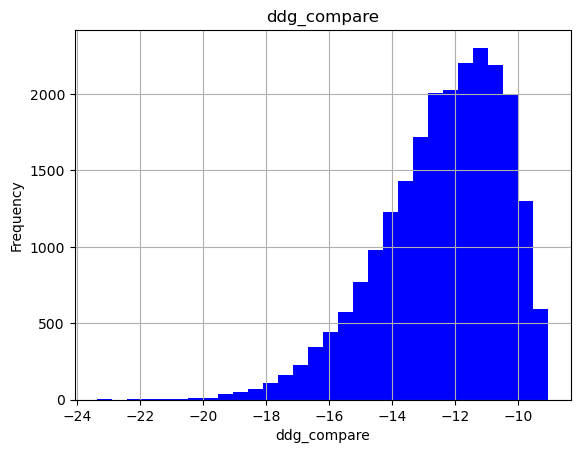

In [73]:
#get close rmsd placements with overall improvements
df_general_high_hbonds = df_general[(df_general['rmsd'] <= 6) & (df_general['hbond_motif_count_delta'] <= -1) & (df_general['hbond_motif_count_compare'] >= 3) & (df_general['ddg_delta'] >= 0) & (df_general['ddg_compare'] <= -15)]
len(df_general_high_hbonds)


219

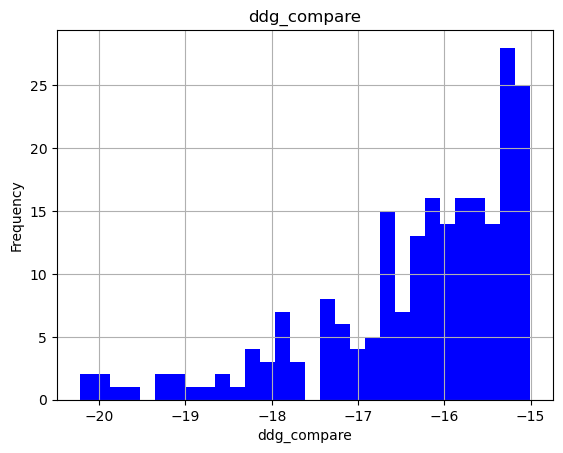

In [74]:
#plot the delta ddg in histogram
x = df_general_high_hbonds['ddg_compare']
#set labels and title
plt.xlabel('ddg_compare')
plt.ylabel('Frequency')
plt.title('ddg_compare')
#create 30 bin 1D hsitogram
plt.hist(x, bins=30, color='blue')
#set grid
plt.grid(True)
#show plot
plt.show()

In [79]:
df_general_high_hbonds

file_initial  \
22891    /scratch/abgvg9/discovery_results/top_1000_placement/10370/placements/7l1u_receptor_only_PV-000576157088_3_0.pdb   
25925     /scratch/abgvg9/discovery_results/top_1000_placement/6629/placements/7l1u_receptor_only_PV-000603284095_7_0.pdb   
29162    /scratch/abgvg9/discovery_results/top_1000_placement/3646/placements/7l1u_receptor_only_PV-001051314575_13_3.pdb   
29646    /scratch/abgvg9/discovery_results/top_1000_placement/3646/placements/7l1u_receptor_only_PV-001051314575_13_3.pdb   
30520    /scratch/abgvg9/discovery_results/top_1000_placement/3646/placements/7l1u_receptor_only_PV-001051314575_13_2.pdb   
...                                                                                                                   ...   
1108725        /scratch/abgvg9/discovery_results/top_1000_placement/1406/placements/7l1u_receptor_only_Z740295064_1_7.pdb   
1108884        /scratch/abgvg9/discovery_results/top_1000_placement/1406/placements/7l1u_receptor_only_Z740295064_1_7.pdb   
1110985        /scratch/abgvg9/discovery_results/top_1000_placement/94/placements/7l1u_receptor_only_Z751217410_12_15.pdb   
1111924        /scratch/abgvg9/discovery_results/top_1000_placement/94/placements/7l1u_receptor_only_Z751217410_12_15.pdb   
1115794        /scratch/abgvg9/discovery_results/top_1000_placement/2744/placements/7l1u_receptor_only_Z929537814_2_1.pdb   

                                                                                                                                                                                           file_compare  \
22891    /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbonds/PV-000576157088/placements/7l1u_receptor_only_PV-000576157088_142_0.pdb   
25925    /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbonds/PV-000603284095/placements/7l1u_receptor_only_PV-000603284095_104_0.pdb   
29162    /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbonds/PV-001051314575/placements/7l1u_receptor_only_PV-001051314575_210_7.pdb   
29646    /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbonds/PV-001051314575/placements/7l1u_receptor_only_PV-001051314575_210_5.pdb   
30520    /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbonds/PV-001051314575/placements/7l1u_receptor_only_PV-001051314575_210_7.pdb   
...                                                                                                                                                                                                 ...   
1108725            /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbonds/Z740295064/placements/7l1u_receptor_only_Z740295064_142_6.pdb   
1108884            /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbonds/Z740295064/placements/7l1u_receptor_only_Z740295064_195_9.pdb   
1110985            /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbonds/Z751217410/placements/7l1u_receptor_only_Z751217410_112_5.pdb   
1111924             /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbonds/Z751217410/placements/7l1u_receptor_only_Z751217410_87_2.pdb   
1115794            /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbonds/Z929537814/placements/7l1u_receptor_only_Z929537814_174_1.pdb   

         ddg_initial  ddg_compare  ddg_delta  total_motifs_initial  \
22891     -10.672614   -15.325175   4.652561                   6.0   
25925     -10.268964   -16.1576

In [76]:
len(df_general_high_hbonds)

219

In [77]:
# Extract ligand names using a regular expression
df_general_high_hbonds['ligand_name'] = df_general_high_hbonds['file_compare'].str.extract(r'7l1u_receptor_only_(.+?)_\d+_\d+\.pdb')

# Find the unique ligand names and their count
unique_ligands = df_general_high_hbonds['ligand_name'].unique()
num_unique_ligands = len(unique_ligands)

# Display the unique ligand names and the count
print("Unique Ligand Names:", unique_ligands)
print("Number of Unique Ligands:", num_unique_ligands)

Unique Ligand Names: ['PV-000576157088' 'PV-000603284095' 'PV-001051314575' 'PV-001414493084'
 'PV-001568749186' 'PV-001625470497' 'PV-001706209823' 'PV-001772630331'
 'PV-002136162040' 'PV-002394949290' 'PV-002463476571' 'PV-002496944995'
 'PV-002519747256' 'PV-003506768917' 'PV-003558683873' 'PV-003725252339'
 'PV-003979815483' 'PV-004175497315' 'PV-004435004691' 'PV-004504869303'
 'PV-004538995030' 'PV-004714066842' 'PV-005016473339' 'PV-005382951371'
 'PV-005431341290' 'PV-005602389067' 'PV-005718134777' 'PV-005797169723'
 'PV-005841322880' 'PV-006130153580' 'PV-006198753977' 'PV-006437521023'
 'PV-006608076951' 'PV-006610816392' 'PV-006612138035' 'PV-006615970627'
 'PV-006619223624' 'PV-006621251098' 'PV-006622081845' 'PV-006627891221'
 'PV-006629953849' 'PV-006631196304' 'PV-006631555747' 'PV-006634533361'
 'PV-006636146622' 'PV-006637145687' 'PV-006637568928' 'PV-006639227717'
 'PV-006640331055' 'PV-006640781836' 'PV-006641445597' 'PV-006641486622'
 'PV-006645562760' 'PV-0066484

/scratch/local/ipykernel_178496/4240062569.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_general_high_hbonds['ligand_name'] = df_general_high_hbonds['file_compare'].str.extract(r'7l1u_receptor_only_(.+?)_\d+_\d+\.pdb')


In [78]:
"""
for i in df_general_high_hbonds['file_initial']:
    #print(i['file_initial'], i['file_compare'])
    print("cp " + i + " /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements")
"""

'\nfor i in df_general_high_hbonds[\'file_initial\']:\n    #print(i[\'file_initial\'], i[\'file_compare\'])\n    print("cp " + i + " /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements")\n'

In [80]:
line_counter = 0
folder_counter = 0


for index, row in df_general_high_hbonds.iterrows():
    
    #make a string of line counter to be 5 digits long
    my_str = str(line_counter)
    while len(my_str) < 5:
        my_str = "0" + my_str
    
    os.system("mkdir /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/" + str(folder_counter))
    #print("cp " + row['file_initial'] + " " + row['file_compare'] + " /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/" + str(folder_counter))
    
    new_init = my_str + "_initial_" + row['file_initial'].split("/")[len(row['file_initial'].split("/")) - 1]
    new_comp = my_str + "_compare_" + row['file_compare'].split("/")[len(row['file_compare'].split("/")) - 1]
    
    print(new_init, new_comp)
    
    #os.system("cp " + row['file_initial'] + " " + row['file_compare'] + " /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/" + str(folder_counter))
    os.system("cp " + row['file_initial'] + " /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/" + str(folder_counter) + "/" + new_init)
    os.system("cp " + row['file_compare'] + " /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/" + str(folder_counter) + "/" + new_comp)
    os.system("sleep 0.1")
    
    line_counter = line_counter + 1
    
    if line_counter % 300 == 0:
        folder_counter = folder_counter + 1

00000_initial_7l1u_receptor_only_PV-000576157088_3_0.pdb 00000_compare_7l1u_receptor_only_PV-000576157088_142_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00001_initial_7l1u_receptor_only_PV-000603284095_7_0.pdb 00001_compare_7l1u_receptor_only_PV-000603284095_104_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00002_initial_7l1u_receptor_only_PV-001051314575_13_3.pdb 00002_compare_7l1u_receptor_only_PV-001051314575_210_7.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00003_initial_7l1u_receptor_only_PV-001051314575_13_3.pdb 00003_compare_7l1u_receptor_only_PV-001051314575_210_5.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00004_initial_7l1u_receptor_only_PV-001051314575_13_2.pdb 00004_compare_7l1u_receptor_only_PV-001051314575_210_7.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00005_initial_7l1u_receptor_only_PV-001051314575_13_2.pdb 00005_compare_7l1u_receptor_only_PV-001051314575_210_5.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00006_initial_7l1u_receptor_only_PV-001414493084_13_0.pdb 00006_compare_7l1u_receptor_only_PV-001414493084_209_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00007_initial_7l1u_receptor_only_PV-001568749186_13_0.pdb 00007_compare_7l1u_receptor_only_PV-001568749186_93_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00008_initial_7l1u_receptor_only_PV-001568749186_13_0.pdb 00008_compare_7l1u_receptor_only_PV-001568749186_74_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00009_initial_7l1u_receptor_only_PV-001568749186_13_0.pdb 00009_compare_7l1u_receptor_only_PV-001568749186_74_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00010_initial_7l1u_receptor_only_PV-001625470497_9_11.pdb 00010_compare_7l1u_receptor_only_PV-001625470497_7_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00011_initial_7l1u_receptor_only_PV-001625470497_9_11.pdb 00011_compare_7l1u_receptor_only_PV-001625470497_7_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00012_initial_7l1u_receptor_only_PV-001706209823_9_3.pdb 00012_compare_7l1u_receptor_only_PV-001706209823_223_7.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00013_initial_7l1u_receptor_only_PV-001772630331_2_1.pdb 00013_compare_7l1u_receptor_only_PV-001772630331_104_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00014_initial_7l1u_receptor_only_PV-002136162040_2_4.pdb 00014_compare_7l1u_receptor_only_PV-002136162040_198_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00015_initial_7l1u_receptor_only_PV-002136162040_2_4.pdb 00015_compare_7l1u_receptor_only_PV-002136162040_198_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00016_initial_7l1u_receptor_only_PV-002136162040_2_4.pdb 00016_compare_7l1u_receptor_only_PV-002136162040_198_7.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00017_initial_7l1u_receptor_only_PV-002136162040_2_4.pdb 00017_compare_7l1u_receptor_only_PV-002136162040_198_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00018_initial_7l1u_receptor_only_PV-002394949290_9_6.pdb 00018_compare_7l1u_receptor_only_PV-002394949290_116_6.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00019_initial_7l1u_receptor_only_PV-002463476571_4_32.pdb 00019_compare_7l1u_receptor_only_PV-002463476571_197_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00020_initial_7l1u_receptor_only_PV-002496944995_5_36.pdb 00020_compare_7l1u_receptor_only_PV-002496944995_18_13.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00021_initial_7l1u_receptor_only_PV-002519747256_10_10.pdb 00021_compare_7l1u_receptor_only_PV-002519747256_156_8.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00022_initial_7l1u_receptor_only_PV-003506768917_6_12.pdb 00022_compare_7l1u_receptor_only_PV-003506768917_134_5.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00023_initial_7l1u_receptor_only_PV-003558683873_9_8.pdb 00023_compare_7l1u_receptor_only_PV-003558683873_120_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00024_initial_7l1u_receptor_only_PV-003725252339_4_2.pdb 00024_compare_7l1u_receptor_only_PV-003725252339_150_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00025_initial_7l1u_receptor_only_PV-003979815483_4_3.pdb 00025_compare_7l1u_receptor_only_PV-003979815483_31_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00026_initial_7l1u_receptor_only_PV-003979815483_4_3.pdb 00026_compare_7l1u_receptor_only_PV-003979815483_144_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00027_initial_7l1u_receptor_only_PV-004175497315_3_6.pdb 00027_compare_7l1u_receptor_only_PV-004175497315_148_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00028_initial_7l1u_receptor_only_PV-004435004691_11_5.pdb 00028_compare_7l1u_receptor_only_PV-004435004691_10_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00029_initial_7l1u_receptor_only_PV-004435004691_11_5.pdb 00029_compare_7l1u_receptor_only_PV-004435004691_8_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00030_initial_7l1u_receptor_only_PV-004435004691_11_5.pdb 00030_compare_7l1u_receptor_only_PV-004435004691_9_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00031_initial_7l1u_receptor_only_PV-004504869303_15_1.pdb 00031_compare_7l1u_receptor_only_PV-004504869303_245_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00032_initial_7l1u_receptor_only_PV-004504869303_15_1.pdb 00032_compare_7l1u_receptor_only_PV-004504869303_242_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00033_initial_7l1u_receptor_only_PV-004538995030_4_0.pdb 00033_compare_7l1u_receptor_only_PV-004538995030_184_5.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00034_initial_7l1u_receptor_only_PV-004714066842_10_2.pdb 00034_compare_7l1u_receptor_only_PV-004714066842_2_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00035_initial_7l1u_receptor_only_PV-005016473339_2_3.pdb 00035_compare_7l1u_receptor_only_PV-005016473339_21_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00036_initial_7l1u_receptor_only_PV-005382951371_13_11.pdb 00036_compare_7l1u_receptor_only_PV-005382951371_154_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00037_initial_7l1u_receptor_only_PV-005431341290_12_1.pdb 00037_compare_7l1u_receptor_only_PV-005431341290_176_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00038_initial_7l1u_receptor_only_PV-005431341290_12_1.pdb 00038_compare_7l1u_receptor_only_PV-005431341290_231_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00039_initial_7l1u_receptor_only_PV-005602389067_13_2.pdb 00039_compare_7l1u_receptor_only_PV-005602389067_239_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00040_initial_7l1u_receptor_only_PV-005718134777_8_0.pdb 00040_compare_7l1u_receptor_only_PV-005718134777_141_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00041_initial_7l1u_receptor_only_PV-005718134777_8_0.pdb 00041_compare_7l1u_receptor_only_PV-005718134777_160_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00042_initial_7l1u_receptor_only_PV-005718134777_8_0.pdb 00042_compare_7l1u_receptor_only_PV-005718134777_44_7.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00043_initial_7l1u_receptor_only_PV-005718134777_8_0.pdb 00043_compare_7l1u_receptor_only_PV-005718134777_159_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00044_initial_7l1u_receptor_only_PV-005797169723_6_1.pdb 00044_compare_7l1u_receptor_only_PV-005797169723_123_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00045_initial_7l1u_receptor_only_PV-005841322880_9_0.pdb 00045_compare_7l1u_receptor_only_PV-005841322880_165_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00046_initial_7l1u_receptor_only_PV-006130153580_13_9.pdb 00046_compare_7l1u_receptor_only_PV-006130153580_115_5.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00047_initial_7l1u_receptor_only_PV-006130153580_13_9.pdb 00047_compare_7l1u_receptor_only_PV-006130153580_177_5.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00048_initial_7l1u_receptor_only_PV-006130153580_13_9.pdb 00048_compare_7l1u_receptor_only_PV-006130153580_111_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00049_initial_7l1u_receptor_only_PV-006130153580_13_9.pdb 00049_compare_7l1u_receptor_only_PV-006130153580_111_9.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00050_initial_7l1u_receptor_only_PV-006130153580_13_9.pdb 00050_compare_7l1u_receptor_only_PV-006130153580_177_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00051_initial_7l1u_receptor_only_PV-006198753977_12_2.pdb 00051_compare_7l1u_receptor_only_PV-006198753977_221_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00052_initial_7l1u_receptor_only_PV-006437521023_6_2.pdb 00052_compare_7l1u_receptor_only_PV-006437521023_36_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00053_initial_7l1u_receptor_only_PV-006437521023_6_2.pdb 00053_compare_7l1u_receptor_only_PV-006437521023_104_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00054_initial_7l1u_receptor_only_PV-006437521023_6_2.pdb 00054_compare_7l1u_receptor_only_PV-006437521023_36_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00055_initial_7l1u_receptor_only_PV-006608076951_13_1.pdb 00055_compare_7l1u_receptor_only_PV-006608076951_84_12.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00056_initial_7l1u_receptor_only_PV-006608076951_13_1.pdb 00056_compare_7l1u_receptor_only_PV-006608076951_84_6.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00057_initial_7l1u_receptor_only_PV-006608076951_13_1.pdb 00057_compare_7l1u_receptor_only_PV-006608076951_171_7.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00058_initial_7l1u_receptor_only_PV-006608076951_13_1.pdb 00058_compare_7l1u_receptor_only_PV-006608076951_171_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00059_initial_7l1u_receptor_only_PV-006608076951_13_1.pdb 00059_compare_7l1u_receptor_only_PV-006608076951_171_8.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00060_initial_7l1u_receptor_only_PV-006608076951_13_1.pdb 00060_compare_7l1u_receptor_only_PV-006608076951_171_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00061_initial_7l1u_receptor_only_PV-006610816392_5_0.pdb 00061_compare_7l1u_receptor_only_PV-006610816392_33_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00062_initial_7l1u_receptor_only_PV-006612138035_15_2.pdb 00062_compare_7l1u_receptor_only_PV-006612138035_72_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00063_initial_7l1u_receptor_only_PV-006612138035_15_2.pdb 00063_compare_7l1u_receptor_only_PV-006612138035_111_9.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00064_initial_7l1u_receptor_only_PV-006612138035_15_6.pdb 00064_compare_7l1u_receptor_only_PV-006612138035_72_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00065_initial_7l1u_receptor_only_PV-006612138035_15_6.pdb 00065_compare_7l1u_receptor_only_PV-006612138035_111_9.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00066_initial_7l1u_receptor_only_PV-006615970627_5_3.pdb 00066_compare_7l1u_receptor_only_PV-006615970627_234_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00067_initial_7l1u_receptor_only_PV-006619223624_6_0.pdb 00067_compare_7l1u_receptor_only_PV-006619223624_34_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00068_initial_7l1u_receptor_only_PV-006619223624_6_0.pdb 00068_compare_7l1u_receptor_only_PV-006619223624_196_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00069_initial_7l1u_receptor_only_PV-006621251098_13_5.pdb 00069_compare_7l1u_receptor_only_PV-006621251098_106_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00070_initial_7l1u_receptor_only_PV-006622081845_5_1.pdb 00070_compare_7l1u_receptor_only_PV-006622081845_18_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00071_initial_7l1u_receptor_only_PV-006627891221_13_1.pdb 00071_compare_7l1u_receptor_only_PV-006627891221_183_5.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00072_initial_7l1u_receptor_only_PV-006629953849_11_1.pdb 00072_compare_7l1u_receptor_only_PV-006629953849_127_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00073_initial_7l1u_receptor_only_PV-006631196304_3_2.pdb 00073_compare_7l1u_receptor_only_PV-006631196304_58_7.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00074_initial_7l1u_receptor_only_PV-006631555747_2_0.pdb 00074_compare_7l1u_receptor_only_PV-006631555747_105_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00075_initial_7l1u_receptor_only_PV-006634533361_7_4.pdb 00075_compare_7l1u_receptor_only_PV-006634533361_5_27.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00076_initial_7l1u_receptor_only_PV-006636146622_14_6.pdb 00076_compare_7l1u_receptor_only_PV-006636146622_121_12.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00077_initial_7l1u_receptor_only_PV-006637145687_12_1.pdb 00077_compare_7l1u_receptor_only_PV-006637145687_137_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00078_initial_7l1u_receptor_only_PV-006637568928_6_2.pdb 00078_compare_7l1u_receptor_only_PV-006637568928_160_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00079_initial_7l1u_receptor_only_PV-006639227717_14_2.pdb 00079_compare_7l1u_receptor_only_PV-006639227717_140_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00080_initial_7l1u_receptor_only_PV-006640331055_13_3.pdb 00080_compare_7l1u_receptor_only_PV-006640331055_54_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00081_initial_7l1u_receptor_only_PV-006640781836_5_4.pdb 00081_compare_7l1u_receptor_only_PV-006640781836_29_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00082_initial_7l1u_receptor_only_PV-006641445597_8_2.pdb 00082_compare_7l1u_receptor_only_PV-006641445597_107_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00083_initial_7l1u_receptor_only_PV-006641486622_8_5.pdb 00083_compare_7l1u_receptor_only_PV-006641486622_31_7.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00084_initial_7l1u_receptor_only_PV-006645562760_2_32.pdb 00084_compare_7l1u_receptor_only_PV-006645562760_123_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00085_initial_7l1u_receptor_only_PV-006645562760_2_32.pdb 00085_compare_7l1u_receptor_only_PV-006645562760_70_20.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00086_initial_7l1u_receptor_only_PV-006645562760_2_32.pdb 00086_compare_7l1u_receptor_only_PV-006645562760_67_22.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00087_initial_7l1u_receptor_only_PV-006648412119_11_19.pdb 00087_compare_7l1u_receptor_only_PV-006648412119_62_8.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00088_initial_7l1u_receptor_only_PV-006648861636_10_5.pdb 00088_compare_7l1u_receptor_only_PV-006648861636_111_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00089_initial_7l1u_receptor_only_PV-006648861636_10_5.pdb 00089_compare_7l1u_receptor_only_PV-006648861636_109_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00090_initial_7l1u_receptor_only_PV-006651157430_13_9.pdb 00090_compare_7l1u_receptor_only_PV-006651157430_47_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00091_initial_7l1u_receptor_only_PV-006652018164_12_9.pdb 00091_compare_7l1u_receptor_only_PV-006652018164_13_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00092_initial_7l1u_receptor_only_PV-006653279699_7_4.pdb 00092_compare_7l1u_receptor_only_PV-006653279699_150_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00093_initial_7l1u_receptor_only_PV-006654881375_4_0.pdb 00093_compare_7l1u_receptor_only_PV-006654881375_37_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00094_initial_7l1u_receptor_only_PV-006656169592_7_0.pdb 00094_compare_7l1u_receptor_only_PV-006656169592_131_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00095_initial_7l1u_receptor_only_PV-006656190255_7_1.pdb 00095_compare_7l1u_receptor_only_PV-006656190255_218_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00096_initial_7l1u_receptor_only_PV-006657648133_8_1.pdb 00096_compare_7l1u_receptor_only_PV-006657648133_233_6.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00097_initial_7l1u_receptor_only_PV-006660262767_10_3.pdb 00097_compare_7l1u_receptor_only_PV-006660262767_157_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00098_initial_7l1u_receptor_only_PV-006660262767_10_3.pdb 00098_compare_7l1u_receptor_only_PV-006660262767_42_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00099_initial_7l1u_receptor_only_PV-006660262767_10_3.pdb 00099_compare_7l1u_receptor_only_PV-006660262767_92_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00100_initial_7l1u_receptor_only_PV-006660262767_10_3.pdb 00100_compare_7l1u_receptor_only_PV-006660262767_151_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00101_initial_7l1u_receptor_only_PV-006660262767_10_3.pdb 00101_compare_7l1u_receptor_only_PV-006660262767_29_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00102_initial_7l1u_receptor_only_PV-006660262767_10_3.pdb 00102_compare_7l1u_receptor_only_PV-006660262767_32_15.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00103_initial_7l1u_receptor_only_PV-006660403904_11_3.pdb 00103_compare_7l1u_receptor_only_PV-006660403904_69_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00104_initial_7l1u_receptor_only_PV-006661198599_5_0.pdb 00104_compare_7l1u_receptor_only_PV-006661198599_81_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00105_initial_7l1u_receptor_only_PV-006663075465_7_0.pdb 00105_compare_7l1u_receptor_only_PV-006663075465_48_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00106_initial_7l1u_receptor_only_PV-006663086633_11_1.pdb 00106_compare_7l1u_receptor_only_PV-006663086633_18_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00107_initial_7l1u_receptor_only_PV-006663208930_12_1.pdb 00107_compare_7l1u_receptor_only_PV-006663208930_21_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00108_initial_7l1u_receptor_only_PV-006666022285_6_1.pdb 00108_compare_7l1u_receptor_only_PV-006666022285_82_10.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00109_initial_7l1u_receptor_only_PV-006666022285_6_1.pdb 00109_compare_7l1u_receptor_only_PV-006666022285_50_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00110_initial_7l1u_receptor_only_PV-006666022285_6_1.pdb 00110_compare_7l1u_receptor_only_PV-006666022285_82_7.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00111_initial_7l1u_receptor_only_PV-006666022285_6_1.pdb 00111_compare_7l1u_receptor_only_PV-006666022285_51_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00112_initial_7l1u_receptor_only_PV-006666022285_6_1.pdb 00112_compare_7l1u_receptor_only_PV-006666022285_49_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00113_initial_7l1u_receptor_only_PV-006666022285_6_1.pdb 00113_compare_7l1u_receptor_only_PV-006666022285_82_9.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00114_initial_7l1u_receptor_only_PV-006666376453_2_3.pdb 00114_compare_7l1u_receptor_only_PV-006666376453_60_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00115_initial_7l1u_receptor_only_PV-006668031637_13_0.pdb 00115_compare_7l1u_receptor_only_PV-006668031637_57_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00116_initial_7l1u_receptor_only_PV-006668031637_13_0.pdb 00116_compare_7l1u_receptor_only_PV-006668031637_57_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00117_initial_7l1u_receptor_only_PV-006668375946_13_10.pdb 00117_compare_7l1u_receptor_only_PV-006668375946_138_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00118_initial_7l1u_receptor_only_PV-006668579529_2_0.pdb 00118_compare_7l1u_receptor_only_PV-006668579529_21_14.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00119_initial_7l1u_receptor_only_PV-006668579529_2_0.pdb 00119_compare_7l1u_receptor_only_PV-006668579529_31_5.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00120_initial_7l1u_receptor_only_PV-006669822259_4_2.pdb 00120_compare_7l1u_receptor_only_PV-006669822259_112_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00121_initial_7l1u_receptor_only_PV-006669822259_4_2.pdb 00121_compare_7l1u_receptor_only_PV-006669822259_96_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00122_initial_7l1u_receptor_only_PV-006676701768_6_2.pdb 00122_compare_7l1u_receptor_only_PV-006676701768_150_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00123_initial_7l1u_receptor_only_PV-006680046115_6_2.pdb 00123_compare_7l1u_receptor_only_PV-006680046115_40_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00124_initial_7l1u_receptor_only_PV-006680046115_6_2.pdb 00124_compare_7l1u_receptor_only_PV-006680046115_39_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00125_initial_7l1u_receptor_only_PV-006680549465_6_1.pdb 00125_compare_7l1u_receptor_only_PV-006680549465_4_27.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00126_initial_7l1u_receptor_only_PV-006680549465_6_1.pdb 00126_compare_7l1u_receptor_only_PV-006680549465_42_14.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00127_initial_7l1u_receptor_only_PV-006680580712_7_3.pdb 00127_compare_7l1u_receptor_only_PV-006680580712_150_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00128_initial_7l1u_receptor_only_PV-006680580712_7_3.pdb 00128_compare_7l1u_receptor_only_PV-006680580712_150_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00129_initial_7l1u_receptor_only_PV-006680580712_7_3.pdb 00129_compare_7l1u_receptor_only_PV-006680580712_187_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00130_initial_7l1u_receptor_only_PV-006687433267_9_3.pdb 00130_compare_7l1u_receptor_only_PV-006687433267_6_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00131_initial_7l1u_receptor_only_PV-006687433267_9_3.pdb 00131_compare_7l1u_receptor_only_PV-006687433267_47_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00132_initial_7l1u_receptor_only_PV-006687433267_9_3.pdb 00132_compare_7l1u_receptor_only_PV-006687433267_63_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00133_initial_7l1u_receptor_only_PV-006689746410_15_0.pdb 00133_compare_7l1u_receptor_only_PV-006689746410_50_5.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00134_initial_7l1u_receptor_only_PV-006692101997_1_11.pdb 00134_compare_7l1u_receptor_only_PV-006692101997_120_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00135_initial_7l1u_receptor_only_PV-006692535201_12_0.pdb 00135_compare_7l1u_receptor_only_PV-006692535201_135_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00136_initial_7l1u_receptor_only_PV-006694797341_1_3.pdb 00136_compare_7l1u_receptor_only_PV-006694797341_199_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00137_initial_7l1u_receptor_only_PV-006694797341_1_3.pdb 00137_compare_7l1u_receptor_only_PV-006694797341_200_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00138_initial_7l1u_receptor_only_PV-006694797341_1_3.pdb 00138_compare_7l1u_receptor_only_PV-006694797341_226_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00139_initial_7l1u_receptor_only_PV-006695892704_3_1.pdb 00139_compare_7l1u_receptor_only_PV-006695892704_141_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00140_initial_7l1u_receptor_only_PV-006697229941_1_0.pdb 00140_compare_7l1u_receptor_only_PV-006697229941_97_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00141_initial_7l1u_receptor_only_PV-006697424470_4_12.pdb 00141_compare_7l1u_receptor_only_PV-006697424470_147_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00142_initial_7l1u_receptor_only_PV-006700145967_11_4.pdb 00142_compare_7l1u_receptor_only_PV-006700145967_208_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00143_initial_7l1u_receptor_only_PV-006701497686_9_0.pdb 00143_compare_7l1u_receptor_only_PV-006701497686_226_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00144_initial_7l1u_receptor_only_PV-006702005961_2_0.pdb 00144_compare_7l1u_receptor_only_PV-006702005961_27_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00145_initial_7l1u_receptor_only_PV-006704065047_6_1.pdb 00145_compare_7l1u_receptor_only_PV-006704065047_114_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00146_initial_7l1u_receptor_only_PV-006704690038_2_1.pdb 00146_compare_7l1u_receptor_only_PV-006704690038_44_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00147_initial_7l1u_receptor_only_PV-006704856288_3_0.pdb 00147_compare_7l1u_receptor_only_PV-006704856288_216_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00148_initial_7l1u_receptor_only_PV-006706116130_5_2.pdb 00148_compare_7l1u_receptor_only_PV-006706116130_192_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00149_initial_7l1u_receptor_only_PV-006707508242_10_4.pdb 00149_compare_7l1u_receptor_only_PV-006707508242_72_6.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00150_initial_7l1u_receptor_only_PV-006707722660_3_0.pdb 00150_compare_7l1u_receptor_only_PV-006707722660_153_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00151_initial_7l1u_receptor_only_PV-006708330623_4_3.pdb 00151_compare_7l1u_receptor_only_PV-006708330623_179_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00152_initial_7l1u_receptor_only_PV-006708626633_8_4.pdb 00152_compare_7l1u_receptor_only_PV-006708626633_32_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00153_initial_7l1u_receptor_only_PV-006708627569_13_3.pdb 00153_compare_7l1u_receptor_only_PV-006708627569_7_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00154_initial_7l1u_receptor_only_PV-006710095262_4_0.pdb 00154_compare_7l1u_receptor_only_PV-006710095262_178_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00155_initial_7l1u_receptor_only_PV-006711944624_3_0.pdb 00155_compare_7l1u_receptor_only_PV-006711944624_79_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00156_initial_7l1u_receptor_only_PV-006714330627_8_6.pdb 00156_compare_7l1u_receptor_only_PV-006714330627_84_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00157_initial_7l1u_receptor_only_Z1265572076_12_2.pdb 00157_compare_7l1u_receptor_only_Z1265572076_51_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00158_initial_7l1u_receptor_only_Z1276827418_3_6.pdb 00158_compare_7l1u_receptor_only_Z1276827418_127_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00159_initial_7l1u_receptor_only_Z1347709382_5_0.pdb 00159_compare_7l1u_receptor_only_Z1347709382_112_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00160_initial_7l1u_receptor_only_Z1347709382_5_0.pdb 00160_compare_7l1u_receptor_only_Z1347709382_159_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00161_initial_7l1u_receptor_only_Z1373903923_5_12.pdb 00161_compare_7l1u_receptor_only_Z1373903923_82_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00162_initial_7l1u_receptor_only_Z1529271829_12_2.pdb 00162_compare_7l1u_receptor_only_Z1529271829_24_8.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00163_initial_7l1u_receptor_only_Z1529271829_12_2.pdb 00163_compare_7l1u_receptor_only_Z1529271829_24_10.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00164_initial_7l1u_receptor_only_Z1614192732_6_1.pdb 00164_compare_7l1u_receptor_only_Z1614192732_103_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00165_initial_7l1u_receptor_only_Z1622050278_2_1.pdb 00165_compare_7l1u_receptor_only_Z1622050278_183_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00166_initial_7l1u_receptor_only_Z1622050278_2_1.pdb 00166_compare_7l1u_receptor_only_Z1622050278_180_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00167_initial_7l1u_receptor_only_Z1622050278_2_1.pdb 00167_compare_7l1u_receptor_only_Z1622050278_118_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00168_initial_7l1u_receptor_only_Z1622050278_2_1.pdb 00168_compare_7l1u_receptor_only_Z1622050278_186_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00169_initial_7l1u_receptor_only_Z1673947780_7_3.pdb 00169_compare_7l1u_receptor_only_Z1673947780_157_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00170_initial_7l1u_receptor_only_Z1679037537_5_4.pdb 00170_compare_7l1u_receptor_only_Z1679037537_17_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00171_initial_7l1u_receptor_only_Z1679037537_5_4.pdb 00171_compare_7l1u_receptor_only_Z1679037537_67_37.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00172_initial_7l1u_receptor_only_Z1679037537_5_4.pdb 00172_compare_7l1u_receptor_only_Z1679037537_82_44.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00173_initial_7l1u_receptor_only_Z1679037537_5_4.pdb 00173_compare_7l1u_receptor_only_Z1679037537_82_7.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00174_initial_7l1u_receptor_only_Z1744437222_6_1.pdb 00174_compare_7l1u_receptor_only_Z1744437222_121_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00175_initial_7l1u_receptor_only_Z1744437222_6_1.pdb 00175_compare_7l1u_receptor_only_Z1744437222_97_9.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00176_initial_7l1u_receptor_only_Z1842528386_9_0.pdb 00176_compare_7l1u_receptor_only_Z1842528386_148_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00177_initial_7l1u_receptor_only_Z1996063223_5_2.pdb 00177_compare_7l1u_receptor_only_Z1996063223_15_7.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00178_initial_7l1u_receptor_only_Z1996063223_5_2.pdb 00178_compare_7l1u_receptor_only_Z1996063223_161_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00179_initial_7l1u_receptor_only_Z1996063223_5_2.pdb 00179_compare_7l1u_receptor_only_Z1996063223_161_9.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00180_initial_7l1u_receptor_only_Z2017261328_15_2.pdb 00180_compare_7l1u_receptor_only_Z2017261328_192_14.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00181_initial_7l1u_receptor_only_Z2017261328_15_2.pdb 00181_compare_7l1u_receptor_only_Z2017261328_230_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00182_initial_7l1u_receptor_only_Z2017261328_15_2.pdb 00182_compare_7l1u_receptor_only_Z2017261328_239_7.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00183_initial_7l1u_receptor_only_Z2017261328_15_2.pdb 00183_compare_7l1u_receptor_only_Z2017261328_75_10.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00184_initial_7l1u_receptor_only_Z2017261328_15_2.pdb 00184_compare_7l1u_receptor_only_Z2017261328_77_12.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00185_initial_7l1u_receptor_only_Z2017261328_15_2.pdb 00185_compare_7l1u_receptor_only_Z2017261328_208_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00186_initial_7l1u_receptor_only_Z2017261328_15_2.pdb 00186_compare_7l1u_receptor_only_Z2017261328_9_8.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00187_initial_7l1u_receptor_only_Z2017261328_15_2.pdb 00187_compare_7l1u_receptor_only_Z2017261328_18_17.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00188_initial_7l1u_receptor_only_Z2017261328_15_2.pdb 00188_compare_7l1u_receptor_only_Z2017261328_192_8.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00189_initial_7l1u_receptor_only_Z2527362725_10_12.pdb 00189_compare_7l1u_receptor_only_Z2527362725_157_7.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00190_initial_7l1u_receptor_only_Z2656047627_15_0.pdb 00190_compare_7l1u_receptor_only_Z2656047627_77_6.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00191_initial_7l1u_receptor_only_Z3366416815_10_2.pdb 00191_compare_7l1u_receptor_only_Z3366416815_83_6.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00192_initial_7l1u_receptor_only_Z394652302_13_1.pdb 00192_compare_7l1u_receptor_only_Z394652302_116_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00193_initial_7l1u_receptor_only_Z394652302_13_1.pdb 00193_compare_7l1u_receptor_only_Z394652302_116_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00194_initial_7l1u_receptor_only_Z394652302_13_1.pdb 00194_compare_7l1u_receptor_only_Z394652302_175_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00195_initial_7l1u_receptor_only_Z394652302_13_1.pdb 00195_compare_7l1u_receptor_only_Z394652302_116_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00196_initial_7l1u_receptor_only_Z4308074781_6_11.pdb 00196_compare_7l1u_receptor_only_Z4308074781_51_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00197_initial_7l1u_receptor_only_Z4308074781_6_11.pdb 00197_compare_7l1u_receptor_only_Z4308074781_12_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00198_initial_7l1u_receptor_only_Z4575777865_11_7.pdb 00198_compare_7l1u_receptor_only_Z4575777865_10_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00199_initial_7l1u_receptor_only_Z4575777865_11_6.pdb 00199_compare_7l1u_receptor_only_Z4575777865_10_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00200_initial_7l1u_receptor_only_Z4575777865_11_0.pdb 00200_compare_7l1u_receptor_only_Z4575777865_10_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00201_initial_7l1u_receptor_only_Z5052318887_9_0.pdb 00201_compare_7l1u_receptor_only_Z5052318887_80_5.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00202_initial_7l1u_receptor_only_Z5052318887_9_0.pdb 00202_compare_7l1u_receptor_only_Z5052318887_217_13.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00203_initial_7l1u_receptor_only_Z5052318887_9_0.pdb 00203_compare_7l1u_receptor_only_Z5052318887_217_11.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00204_initial_7l1u_receptor_only_Z5052318887_9_0.pdb 00204_compare_7l1u_receptor_only_Z5052318887_217_7.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00205_initial_7l1u_receptor_only_Z5052318887_9_0.pdb 00205_compare_7l1u_receptor_only_Z5052318887_80_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00206_initial_7l1u_receptor_only_Z5063076522_3_10.pdb 00206_compare_7l1u_receptor_only_Z5063076522_114_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00207_initial_7l1u_receptor_only_Z5063076522_3_10.pdb 00207_compare_7l1u_receptor_only_Z5063076522_114_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00208_initial_7l1u_receptor_only_Z740295064_1_7.pdb 00208_compare_7l1u_receptor_only_Z740295064_77_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00209_initial_7l1u_receptor_only_Z740295064_1_7.pdb 00209_compare_7l1u_receptor_only_Z740295064_77_5.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00210_initial_7l1u_receptor_only_Z740295064_1_7.pdb 00210_compare_7l1u_receptor_only_Z740295064_153_6.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00211_initial_7l1u_receptor_only_Z740295064_1_7.pdb 00211_compare_7l1u_receptor_only_Z740295064_142_5.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00212_initial_7l1u_receptor_only_Z740295064_1_7.pdb 00212_compare_7l1u_receptor_only_Z740295064_167_12.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00213_initial_7l1u_receptor_only_Z740295064_1_7.pdb 00213_compare_7l1u_receptor_only_Z740295064_195_10.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00214_initial_7l1u_receptor_only_Z740295064_1_7.pdb 00214_compare_7l1u_receptor_only_Z740295064_142_6.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00215_initial_7l1u_receptor_only_Z740295064_1_7.pdb 00215_compare_7l1u_receptor_only_Z740295064_195_9.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00216_initial_7l1u_receptor_only_Z751217410_12_15.pdb 00216_compare_7l1u_receptor_only_Z751217410_112_5.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00217_initial_7l1u_receptor_only_Z751217410_12_15.pdb 00217_compare_7l1u_receptor_only_Z751217410_87_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/0’: File exists


00218_initial_7l1u_receptor_only_Z929537814_2_1.pdb 00218_compare_7l1u_receptor_only_Z929537814_174_1.pdb


In [81]:
#write the df_general_high_hbonds to csv
df_general_high_hbonds.to_csv('/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/real_and_hbond_best_improved_placements_sheet.csv', index=False)

In [5]:
#look for previous liked "yes" placements in the df_general to see how they did

#NOTE this is the low ddg, and it looks like none of these actually were low ddg initially, run this in the real and hbond doc

previous_yes_placements = ["PV-000574408508","PV-004660274189","PV-004308931941","PV-006612894357","PV-006710354450","PV-006617156758","Z3877772075","PV-006702960116","PV-006713619448"]

filtered_df = df_general[df_general['file_initial'].apply(lambda x: any(substring in x for substring in previous_yes_placements))]

len(filtered_df)

1759

In [6]:
filtered_df

file_initial  \
22253    /scratch/abgvg9/discovery_results/top_1000_placement/4393/placements/7l1u_receptor_only_PV-000574408508_3_2.pdb   
22254    /scratch/abgvg9/discovery_results/top_1000_placement/4393/placements/7l1u_receptor_only_PV-000574408508_3_2.pdb   
22255    /scratch/abgvg9/discovery_results/top_1000_placement/4393/placements/7l1u_receptor_only_PV-000574408508_3_2.pdb   
22256    /scratch/abgvg9/discovery_results/top_1000_placement/4393/placements/7l1u_receptor_only_PV-000574408508_3_2.pdb   
22257    /scratch/abgvg9/discovery_results/top_1000_placement/4393/placements/7l1u_receptor_only_PV-000574408508_3_2.pdb   
...                                                                                                                  ...   
1072767        /scratch/abgvg9/discovery_results/top_1000_placement/76/placements/7l1u_receptor_only_Z3877772075_3_1.pdb   
1072768        /scratch/abgvg9/discovery_results/top_1000_placement/76/placements/7l1u_receptor_only_Z3877772075_3_1.pdb   
1072769        /scratch/abgvg9/discovery_results/top_1000_placement/76/placements/7l1u_receptor_only_Z3877772075_3_1.pdb   
1072770        /scratch/abgvg9/discovery_results/top_1000_placement/76/placements/7l1u_receptor_only_Z3877772075_3_1.pdb   
1072771        /scratch/abgvg9/discovery_results/top_1000_placement/76/placements/7l1u_receptor_only_Z3877772075_3_1.pdb   

                                                                                                                                                                                           file_compare  \
22253     /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbonds/PV-000574408508/placements/7l1u_receptor_only_PV-000574408508_43_0.pdb   
22254    /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbonds/PV-000574408508/placements/7l1u_receptor_only_PV-000574408508_176_0.pdb   
22255     /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbonds/PV-000574408508/placements/7l1u_receptor_only_PV-000574408508_61_0.pdb   
22256    /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbonds/PV-000574408508/placements/7l1u_receptor_only_PV-000574408508_154_1.pdb   
22257     /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbonds/PV-000574408508/placements/7l1u_receptor_only_PV-000574408508_89_2.pdb   
...                                                                                                                                                                                                 ...   
1072767           /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbonds/Z3877772075/placements/7l1u_receptor_only_Z3877772075_35_1.pdb   
1072768           /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbonds/Z3877772075/placements/7l1u_receptor_only_Z3877772075_38_2.pdb   
1072769           /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbonds/Z3877772075/placements/7l1u_receptor_only_Z3877772075_15_0.pdb   
1072770           /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbonds/Z3877772075/placements/7l1u_receptor_only_Z3877772075_15_3.pdb   
1072771           /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbonds/Z3877772075/placements/7l1u_receptor_only_Z3877772075_25_2.pdb   

         ddg_initial  ddg_compare  ddg_delta  total_motifs_initial  \
22253     -12.856941    -9.513805  -3.343136                   8.0   
22254     -12.856941    -9.354130  -3.5028

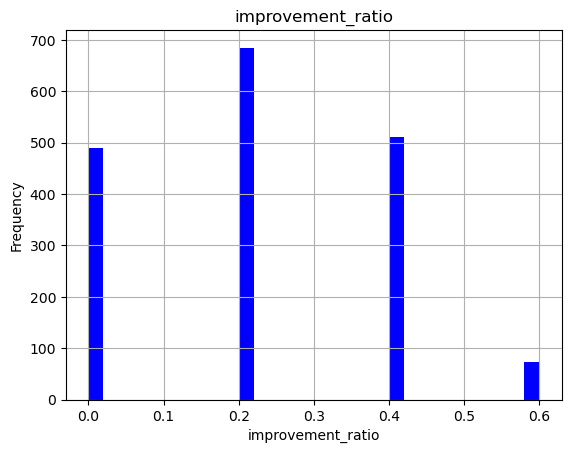

In [10]:
#with filtered_df, get graphs on metrics like how improved any of the placements were

#start with improvement ratio


#plot the delta ddg in histogram
x = filtered_df['improvement_ratio']
#set labels and title
plt.xlabel('improvement_ratio')
plt.ylabel('Frequency')
plt.title('improvement_ratio')
#create 30 bin 1D hsitogram
plt.hist(x, bins=30, color='blue')
#set grid
plt.grid(True)
#show plot
plt.show()

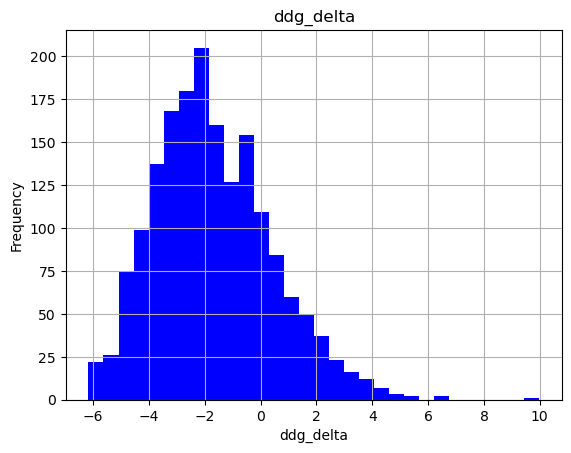

In [11]:
#see delta ddg
#remember, positive value means that the ddg improved upon refinement

#plot the delta ddg in histogram
x = filtered_df['ddg_delta']
#set labels and title
plt.xlabel('ddg_delta')
plt.ylabel('Frequency')
plt.title('ddg_delta')
#create 30 bin 1D hsitogram
plt.hist(x, bins=30, color='blue')
#set grid
plt.grid(True)
#show plot
plt.show()

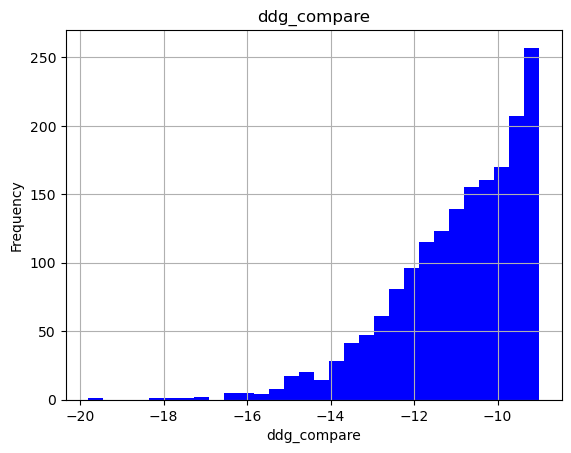

In [12]:
#see distribution of low free energy placements

#plot the delta ddg in histogram
x = filtered_df['ddg_compare']
#set labels and title
plt.xlabel('ddg_compare')
plt.ylabel('Frequency')
plt.title('ddg_compare')
#create 30 bin 1D hsitogram
plt.hist(x, bins=30, color='blue')
#set grid
plt.grid(True)
#show plot
plt.show()

In [16]:
#get a count on the number of placements from the filtered set that have a ddg <-15
len(filtered_df[(filtered_df['ddg_compare'] <= -15)])


33

In [17]:
low_ddg_filtered_df = filtered_df[(filtered_df['ddg_compare'] <= -15)]

In [18]:
low_ddg_filtered_df

file_initial  \
22291     /scratch/abgvg9/discovery_results/top_1000_placement/4393/placements/7l1u_receptor_only_PV-000574408508_3_2.pdb   
22296     /scratch/abgvg9/discovery_results/top_1000_placement/4393/placements/7l1u_receptor_only_PV-000574408508_3_2.pdb   
160711   /scratch/abgvg9/discovery_results/top_1000_placement/1498/placements/7l1u_receptor_only_PV-004308931941_12_2.pdb   
160903   /scratch/abgvg9/discovery_results/top_1000_placement/1498/placements/7l1u_receptor_only_PV-004308931941_12_1.pdb   
178839    /scratch/abgvg9/discovery_results/top_1000_placement/2041/placements/7l1u_receptor_only_PV-004660274189_4_1.pdb   
178876    /scratch/abgvg9/discovery_results/top_1000_placement/2041/placements/7l1u_receptor_only_PV-004660274189_4_1.pdb   
288021    /scratch/abgvg9/discovery_results/top_1000_placement/3483/placements/7l1u_receptor_only_PV-006612894357_7_0.pdb   
288093    /scratch/abgvg9/discovery_results/top_1000_placement/3483/placements/7l1u_receptor_only_PV-006612894357_7_0.pdb   
312147    /scratch/abgvg9/discovery_results/top_1000_placement/3840/placements/7l1u_receptor_only_PV-006617156758_6_2.pdb   
921603   /scratch/abgvg9/discovery_results/top_1000_placement/11601/placements/7l1u_receptor_only_PV-006710354450_1_1.pdb   
921616   /scratch/abgvg9/discovery_results/top_1000_placement/11601/placements/7l1u_receptor_only_PV-006710354450_1_1.pdb   
921639   /scratch/abgvg9/discovery_results/top_1000_placement/11601/placements/7l1u_receptor_only_PV-006710354450_1_1.pdb   
940947  /scratch/abgvg9/discovery_results/top_1000_placement/11872/placements/7l1u_receptor_only_PV-006713619448_15_1.pdb   
940955  /scratch/abgvg9/discovery_results/top_1000_placement/11872/placements/7l1u_receptor_only_PV-006713619448_15_1.pdb   
940984  /scratch/abgvg9/discovery_results/top_1000_placement/11872/placements/7l1u_receptor_only_PV-006713619448_15_1.pdb   
941050  /scratch/abgvg9/discovery_results/top_1000_placement/11872/placements/7l1u_receptor_only_PV-006713619448_15_1.pdb   
941056  /scratch/abgvg9/discovery_results/top_1000_placement/11872/placements/7l1u_receptor_only_PV-006713619448_15_1.pdb   
941063  /scratch/abgvg9/discovery_results/top_1000_placement/11872/placements/7l1u_receptor_only_PV-006713619448_15_1.pdb   
941071  /scratch/abgvg9/discovery_results/top_1000_placement/11872/placements/7l1u_receptor_only_PV-006713619448_15_1.pdb   
941096  /scratch/abgvg9/discovery_results/top_1000_placement/11872/placements/7l1u_receptor_only_PV-006713619448_15_1.pdb   
941097  /scratch/abgvg9/discovery_results/top_1000_placement/11872/placements/7l1u_receptor_only_PV-006713619448_15_1.pdb   
941107  /scratch/abgvg9/discovery_results/top_1000_placement/11872/placements/7l1u_receptor_only_PV-006713619448_15_1.pdb   
941118  /scratch/abgvg9/discovery_results/top_1000_placement/11872/placements/7l1u_receptor_only_PV-006713619448_15_1.pdb   
941123  /scratch/abgvg9/discovery_results/top_1000_placement/11872/placements/7l1u_receptor_only_PV-006713619448_15_1.pdb   
941145  /scratch/abgvg9/discovery_results/top_1000_placement/11872/placements/7l1u_receptor_only_PV-006713619448_15_1.pdb   
941181  /scratch/abgvg9/discovery_results/top_1000_placement/11872/placements/7l1u_receptor_only_PV-006713619448_15_1.pdb   
941191  /scratch/abgvg9/discovery_results/top_1000_placement/11872/placements/7l1u_receptor_only_PV-006713619448_15_1.pdb   
941196  /scratch/abgvg9/discovery_results/top_1000_placement/11872/placements/7l1u_receptor_only_PV-006713619448_15_1.pdb   
941198  /scratch/abgvg9/discovery_results/top_1000_placement/11872/placements/7l1u_receptor_only_PV-006713619448_15_1.pdb   
941228  /scratch/abgvg9/discovery_results/top_1000_placement/11872/placements/7l1u_receptor_only_PV-006713619448_15_1.pdb   
941240  /scratch/abgvg9/discovery_results/top_1000_placement/11872/placements/7l1u_receptor_only_PV-006713619448_15_1.pdb   
941247  /scratch/abgvg9/discovery_results/top_1000_placement/11872/placements/7l1u_receptor_only_PV-006713619

In [ ]:
#below here is old stuff for  reference

In [32]:
#ddg
x = df['hbond_motif_count']
#set labels and title
plt.xlabel('hbond_motif_count')
plt.ylabel('Frequency')
plt.title('hbond_motif_count')
#create 30 bin 1D hsitogram
plt.hist(x, bins=5, color='blue')
#set grid
plt.grid(True)
#show plot
plt.show()

KeyError: 'hbond_motif_count'

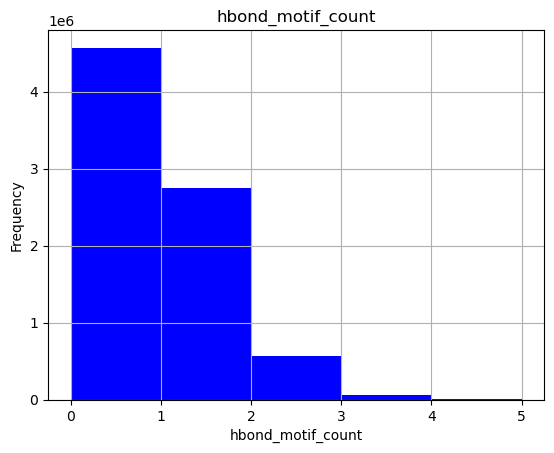

In [6]:
#ddg
x = df_general['hbond_motif_count']
#set labels and title
plt.xlabel('hbond_motif_count')
plt.ylabel('Frequency')
plt.title('hbond_motif_count')
#create 30 bin 1D hsitogram
plt.hist(x, bins=5, color='blue')
#set grid
plt.grid(True)
#show plot
plt.show()

In [7]:
#make dataframe with only rosetta hbond count of 4
df_4_hbonds = df[df['hbond_motif_count'] >= 4]
df_4_hbonds = df_4_hbonds.sort_values(by='ddg')

In [8]:
df_4_hbonds

file  \
3987180      4917/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/4917/placements/7l1u_receptor_only_PV-006630074224_6_2.pdb   
1200041   11534/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/11534/placements/7l1u_receptor_only_PV-006709534647_13_0.pdb   
7524540      9442/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/9442/placements/7l1u_receptor_only_PV-000358429369_2_1.pdb   
4905259      6091/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/6091/placements/7l1u_receptor_only_PV-006644138025_5_0.pdb   
4868153     6043/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/6043/placements/7l1u_receptor_only_PV-001474966193_11_3.pdb   
6948982      8712/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/8712/placements/7l1u_receptor_only_PV-006675501110_7_2.pdb   
6009608      7507/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/7507/placements/7l1u_receptor_only_PV-006661059626_6_0.pdb   
4372162      5407/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/5407/placements/7l1u_receptor_only_PV-006635907047_3_0.pdb   
1482459     1189/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/1189/placements/7l1u_receptor_only_PV-006081045122_14_1.pdb   
4904783      6091/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/6091/placements/7l1u_receptor_only_PV-006644138025_5_3.pdb   
312246     10395/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/10395/placements/7l1u_receptor_only_PV-006695706512_4_1.pdb   
7285220      9135/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/9135/placements/7l1u_receptor_only_PV-006680579892_7_0.pdb   
445705     10563/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/10563/placements/7l1u_receptor_only_PV-006697709761_8_0.pdb   
3294181     4055/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/4055/placements/7l1u_receptor_only_PV-006619727509_13_0.pdb   
1774891      1640/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/1640/placements/7l1u_receptor_only_PV-004767425384_6_0.pdb   
6849338      8584/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/8584/placements/7l1u_receptor_only_PV-006673990710_8_0.pdb   
7172876     8994/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/8994/placements/7l1u_receptor_only_PV-006678902148_12_3.pdb   
2915943      3571/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/3571/placements/7l1u_receptor_only_PV-006613943232_8_1.pdb   
1172509    11498/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/11498/placements/7l1u_receptor_only_PV-006709114079_3_2.pdb   
5498359      6852/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/6852/placements/7l1u_receptor_only_PV-006653256286_5_0.pdb   
3681350      4545/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/4545/placements/7l1u_receptor_only_PV-006625600913_4_3.pdb   
4904748      6091/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/6091/placements/7l1u_receptor_only_PV-006644138025_5_2.pdb   
3932560      4850/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/4850/placements/7l1u_receptor_only_PV-006629267062_8_4.pdb   
4156299      5126/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/5126/placements/7l1u_receptor_only_PV-006632531412_2_0.pdb   
4936303      6131/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/6131/placements/7l1u_receptor_only_PV-006644604018_5_1.pdb   
5498659     6852/

In [9]:
len(df_4_hbonds)

3098

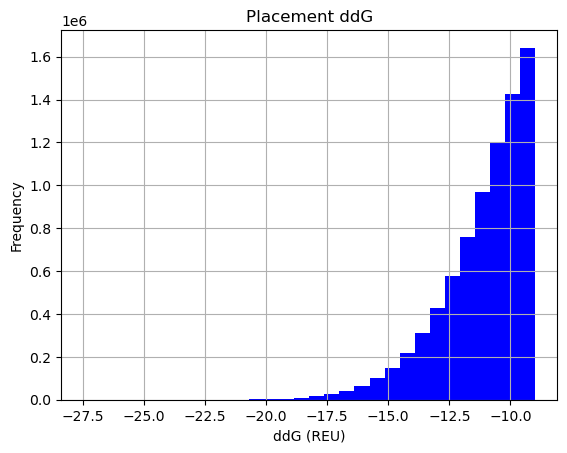

In [10]:
#ddg
x = df['ddg']
#set labels and title
plt.xlabel('ddG (REU)')
plt.ylabel('Frequency')
plt.title('Placement ddG')
#create 30 bin 1D hsitogram
plt.hist(x, bins=30, color='blue')
#set grid
plt.grid(True)
#show plot
plt.show()

In [11]:
#make new dataframe with ddg above certain thresholds
df_17 = df[df['ddg'] < -17]

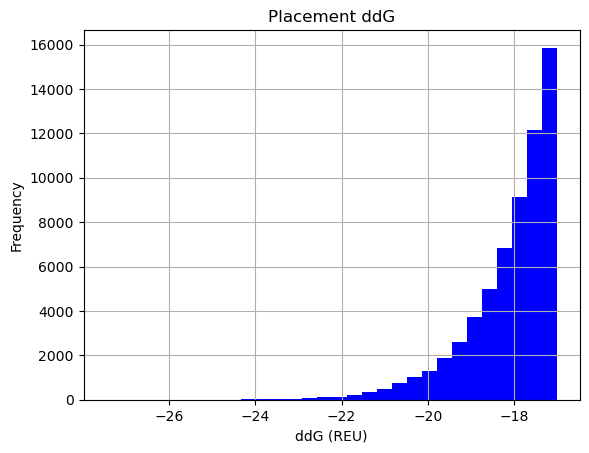

In [12]:
#ddg
x = df_17['ddg']
#set labels and title
plt.xlabel('ddG (REU)')
plt.ylabel('Frequency')
plt.title('Placement ddG')
#create 30 bin 1D hsitogram
plt.hist(x, bins=30, color='blue')
#set grid
plt.grid(True)
#show plot
plt.show()

In [13]:
#make new dataframe that selects for real motif ratio to be at least 0.25
df_17_real_quarter = df_17[df_17['real_motif_ratio'] >= 0.25]

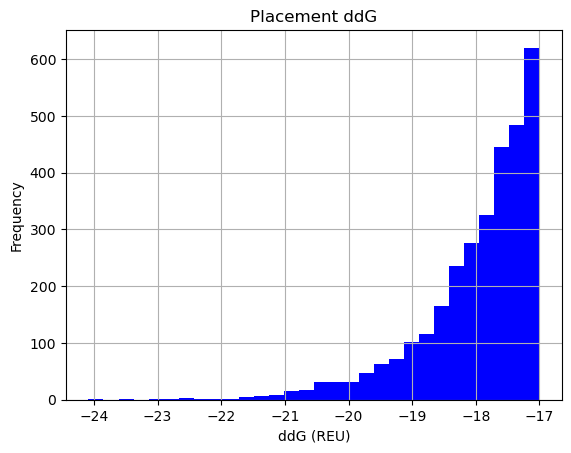

In [14]:
#ddg
x = df_17_real_quarter['ddg']
#set labels and title
plt.xlabel('ddG (REU)')
plt.ylabel('Frequency')
plt.title('Placement ddG')
#create 30 bin 1D hsitogram
plt.hist(x, bins=30, color='blue')
#set grid
plt.grid(True)
#show plot
plt.show()

In [16]:
len(df_17_real_quarter)

3110

In [17]:
#make new dataframe that selects for having at least 1 rosetta hbond
df_17_real_quarter_rosetta_hbond = df_17_real_quarter[df_17_real_quarter['hbond_motif_count'] >= 2]

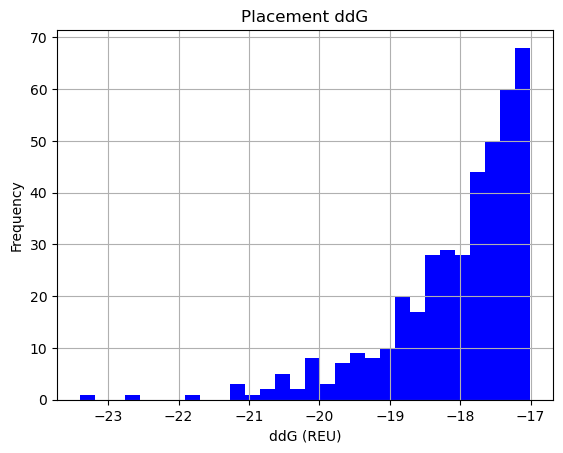

In [18]:
#ddg
x = df_17_real_quarter_rosetta_hbond['ddg']
#set labels and title
plt.xlabel('ddG (REU)')
plt.ylabel('Frequency')
plt.title('Placement ddG')
#create 30 bin 1D hsitogram
plt.hist(x, bins=30, color='blue')
#set grid
plt.grid(True)
#show plot
plt.show()

In [19]:
len(df_17_real_quarter_rosetta_hbond)

405

In [20]:
df_17_real_quarter_rosetta_hbond = df_17_real_quarter_rosetta_hbond.sort_values(by='ddg')

In [21]:
df_17_real_quarter_rosetta_hbond.to_csv('/scratch/abgvg9/discovery_results/top_1000_placement/12M_-17_real_hbond.csv', index=False)

In [22]:
df_17_real_quarter_rosetta_hbond

file  \
5239947      6521/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/6521/placements/7l1u_receptor_only_PV-006649281448_5_1.pdb   
4803803     5961/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/5961/placements/7l1u_receptor_only_PV-006642575375_11_0.pdb   
1289517    11651/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/11651/placements/7l1u_receptor_only_PV-000407144265_2_0.pdb   
6240273      7806/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/7806/placements/7l1u_receptor_only_PV-001894047689_1_0.pdb   
3033618      3721/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/3721/placements/7l1u_receptor_only_PV-006615739888_9_1.pdb   
6130484      7661/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/7661/placements/7l1u_receptor_only_PV-006662908479_4_1.pdb   
4810171     5970/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/5970/placements/7l1u_receptor_only_PV-006642674779_12_0.pdb   
3312838      4079/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/4079/placements/7l1u_receptor_only_PV-006620012151_7_3.pdb   
7825695      9826/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/9826/placements/7l1u_receptor_only_PV-006688858672_1_0.pdb   
2950647     3613/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/3613/placements/7l1u_receptor_only_PV-006614444158_13_0.pdb   
220417     10279/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/10279/placements/7l1u_receptor_only_PV-006694327860_2_0.pdb   
249660     10314/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/10314/placements/7l1u_receptor_only_PV-006694747026_4_0.pdb   
6565611     8222/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/8222/placements/7l1u_receptor_only_PV-006669629110_13_6.pdb   
1019282    11302/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/11302/placements/7l1u_receptor_only_PV-006706777156_1_3.pdb   
2060387     2235/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/2235/placements/7l1u_receptor_only_PV-005239022292_12_0.pdb   
3223007      3966/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/3966/placements/7l1u_receptor_only_PV-006618639665_2_0.pdb   
3573386      4411/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/4411/placements/7l1u_receptor_only_PV-006623981273_1_0.pdb   
1074492   11375/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/11375/placements/7l1u_receptor_only_PV-006707650533_10_4.pdb   
2603120      3177/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/3177/placements/7l1u_receptor_only_PV-006609257537_7_1.pdb   
1061970    11358/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/11358/placements/7l1u_receptor_only_PV-006707453830_1_1.pdb   
1945767      1990/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/1990/placements/7l1u_receptor_only_PV-004507097792_8_1.pdb   
658740    10836/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/10836/placements/7l1u_receptor_only_PV-006701191685_12_5.pdb   
4327543     5349/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/5349/placements/7l1u_receptor_only_PV-006635245217_13_1.pdb   
4218619      5207/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/5207/placements/7l1u_receptor_only_PV-006633535034_9_0.pdb   
4152482      5121/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/5121/placements/7l1u_receptor_only_PV-006632485044_1_2.pdb   
2060693     2235/

In [32]:
#make new dataframe with ddg above certain thresholds
df_16 = df[df['ddg'] < -16]

In [33]:
#make new dataframe that selects for real motif ratio to be at least 0.25
df_16_real_quarter = df_16[df_16['real_motif_ratio'] >= 0.25]

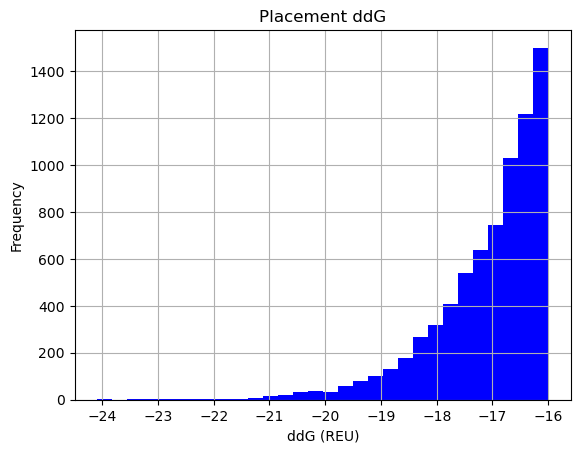

In [34]:
#ddg
x = df_16_real_quarter['ddg']
#set labels and title
plt.xlabel('ddG (REU)')
plt.ylabel('Frequency')
plt.title('Placement ddG')
#create 30 bin 1D hsitogram
plt.hist(x, bins=30, color='blue')
#set grid
plt.grid(True)
#show plot
plt.show()

In [35]:
len(df_16_real_quarter)

7382

In [36]:
df_16_real_quarter.to_csv('/scratch/abgvg9/discovery_results/top_1000_placement/12M_-16_ddg_quarter_real.csv', index=False)

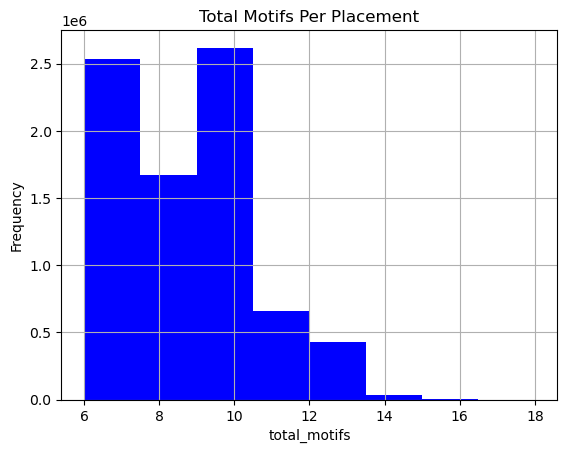

In [23]:
#total motifs
x = df['total_motifs']
#set labels and title
plt.xlabel('total_motifs')
plt.ylabel('Frequency')
plt.title('Total Motifs Per Placement')
#create 30 bin 1D hsitogram
plt.hist(x, bins=8, color='blue')
#set grid
plt.grid(True)
#show plot
plt.show()

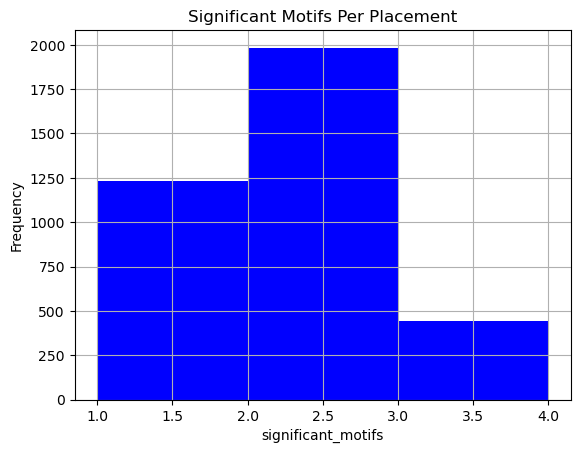

In [8]:
#significant motifs
x = df['significant_motifs']
#set labels and title
plt.xlabel('significant_motifs')
plt.ylabel('Frequency')
plt.title('Significant Motifs Per Placement')
#create 30 bin 1D hsitogram
plt.hist(x, bins=3, color='blue')
#set grid
plt.grid(True)
#show plot
plt.show()

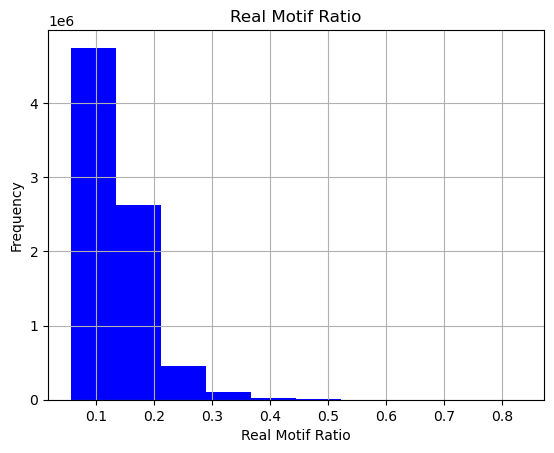

In [17]:
#real motifs ratio
x = df['real_motif_ratio']
#set labels and title
plt.xlabel('Real Motif Ratio')
plt.ylabel('Frequency')
plt.title('Real Motif Ratio')
#create 30 bin 1D hsitogram
plt.hist(x, bins=10, color='blue')
#set grid
plt.grid(True)
#show plot
plt.show()

In [18]:
df_real_half = df[df['real_motif_ratio'] >= 0.5]

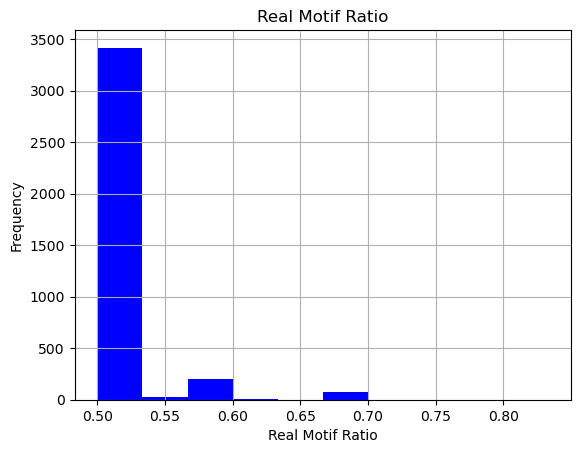

In [19]:
#real motifs ratio
x = df_real_half['real_motif_ratio']
#set labels and title
plt.xlabel('Real Motif Ratio')
plt.ylabel('Frequency')
plt.title('Real Motif Ratio')
#create 30 bin 1D hsitogram
plt.hist(x, bins=10, color='blue')
#set grid
plt.grid(True)
#show plot
plt.show()

In [20]:
len(df_real_half)

3726

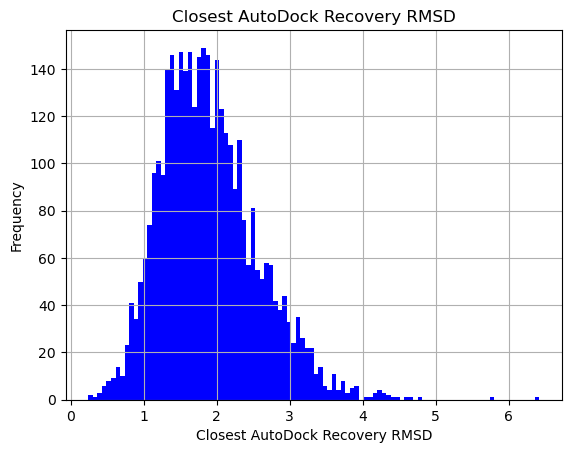

In [10]:
#closest_autodock_recovery_rmsd
#note, if autodock failed to get any placements for the ligand, the default is to set the value to 100
x = df['closest_autodock_recovery_rmsd']
#set labels and title
plt.xlabel('Closest AutoDock Recovery RMSD')
plt.ylabel('Frequency')
plt.title('Closest AutoDock Recovery RMSD')
#create 30 bin 1D hsitogram
plt.hist(x, bins=100, color='blue')
#set grid
plt.grid(True)
#show plot
plt.show()

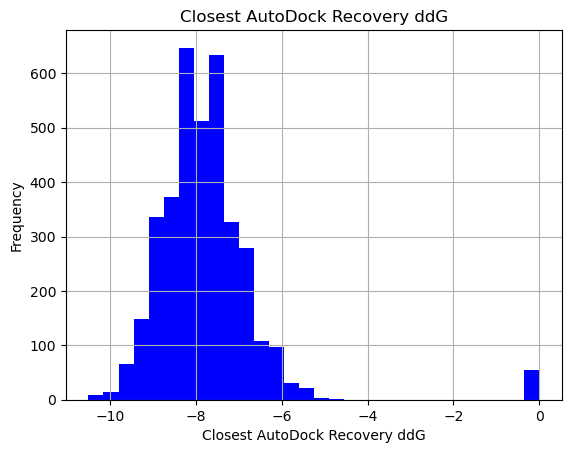

In [11]:
#closest_autodock_recovery_ddg
#note, if autodock failed to get any placements for the ligand, the default is to set the value to 0
x = df['closest_autodock_recovery_ddg']
#set labels and title
plt.xlabel('Closest AutoDock Recovery ddG')
plt.ylabel('Frequency')
plt.title('Closest AutoDock Recovery ddG')
#create 30 bin 1D hsitogram
plt.hist(x, bins=30, color='blue')
#set grid
plt.grid(True)
#show plot
plt.show()

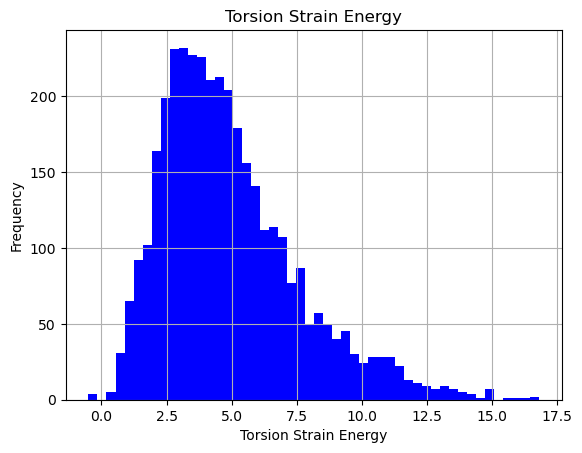

In [23]:
#torsion strain energy
#note, if STRAIN failed to get an energy for the ligand, the default is to set the value to 100
x = df['strain_energy']
#set labels and title
plt.xlabel('Torsion Strain Energy')
plt.ylabel('Frequency')
plt.title('Torsion Strain Energy')
#create 30 bin 1D hsitogram
plt.hist(x, bins=50, color='blue')
#set grid
plt.grid(True)
#show plot
plt.show()

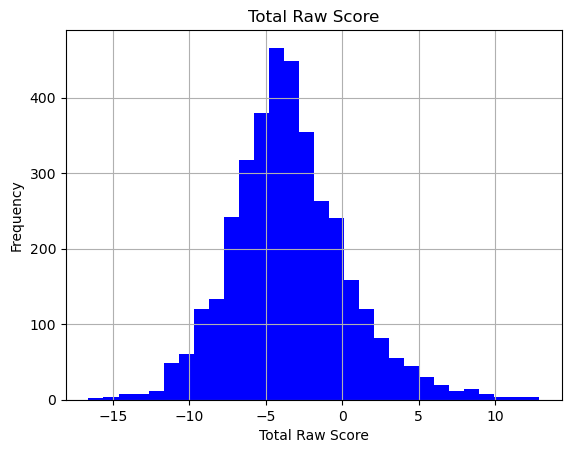

In [13]:
#total score
#raw total score can be very skewed, and likely not a good metric at all
x = df['total']
#set labels and title
plt.xlabel('Total Raw Score')
plt.ylabel('Frequency')
plt.title('Total Raw Score')
#create 30 bin 1D hsitogram
plt.hist(x, bins=30, color='blue')
#set grid
plt.grid(True)
#show plot
plt.show()

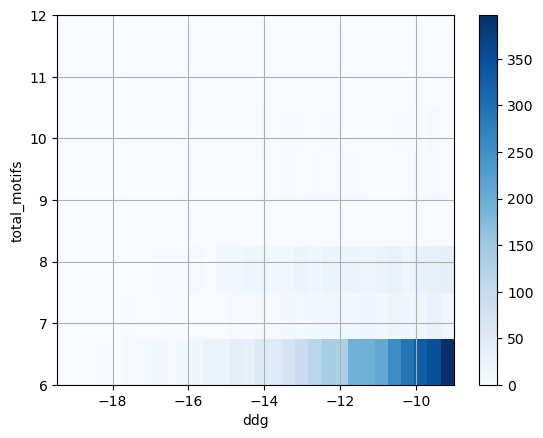

In [27]:
#Create heatmap of rmsds per system (n=85) between AutoDock and Rosetta Motifs
#Expanding x and y max to 10
#Using Blues color scale to allow for zeros to be white

x = df['ddg']
y = df['total_motifs']

heatmap, xedges, yedges = np.histogram2d(x, y, bins=(30, 8))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.xlabel('ddg')
plt.ylabel('total_motifs')

plt.imshow(heatmap.T, extent=extent, origin='lower', cmap='Blues', aspect='auto')

plt.colorbar()

plt.grid(True)
plt.show()

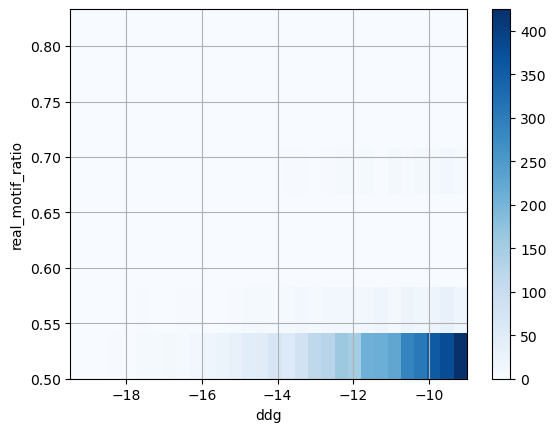

In [28]:
#Create heatmap of rmsds per system (n=85) between AutoDock and Rosetta Motifs
#Expanding x and y max to 10
#Using Blues color scale to allow for zeros to be white

x = df['ddg']
y = df['real_motif_ratio']

heatmap, xedges, yedges = np.histogram2d(x, y, bins=(30, 8))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.xlabel('ddg')
plt.ylabel('real_motif_ratio')

plt.imshow(heatmap.T, extent=extent, origin='lower', cmap='Blues', aspect='auto')

plt.colorbar()

plt.grid(True)
plt.show()

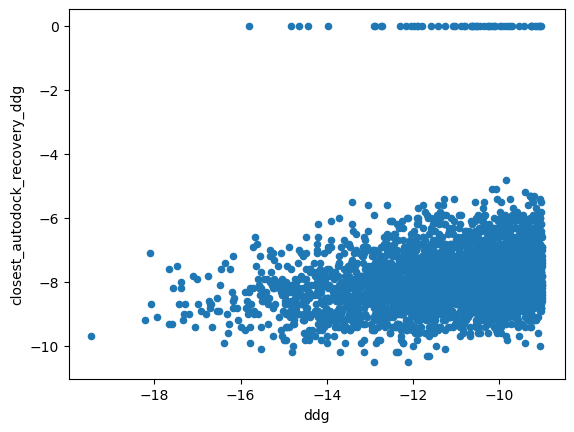

In [16]:
df.plot(kind='scatter',x='ddg',y='closest_autodock_recovery_ddg')
plt.show()

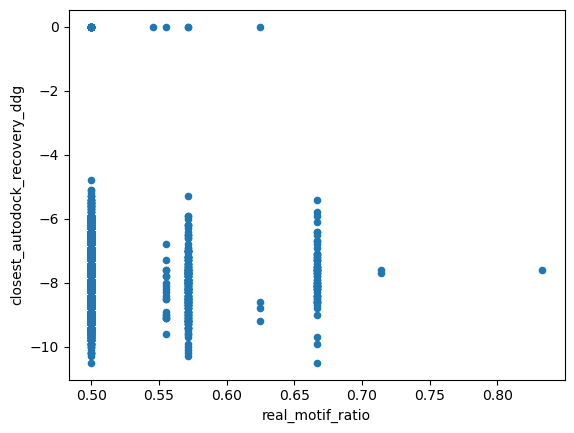

In [17]:
df.plot(kind='scatter',x='real_motif_ratio',y='closest_autodock_recovery_ddg')
plt.show()

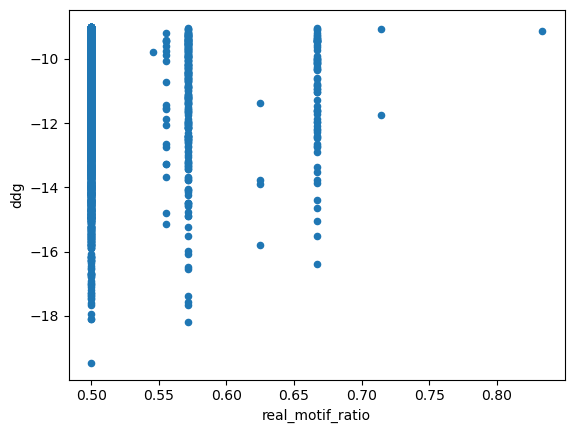

In [18]:
df.plot(kind='scatter',x='real_motif_ratio',y='ddg')
plt.show()

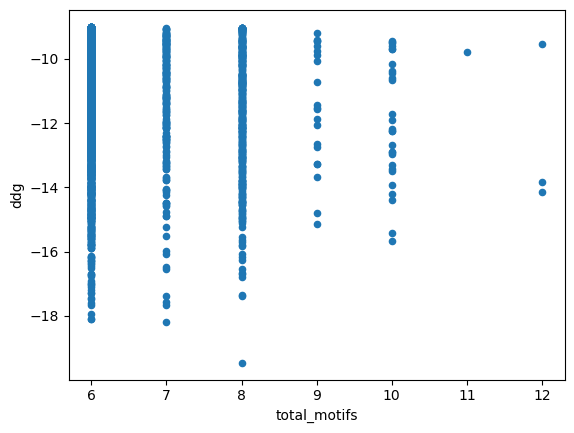

In [19]:
df.plot(kind='scatter',x='total_motifs',y='ddg')
plt.show()

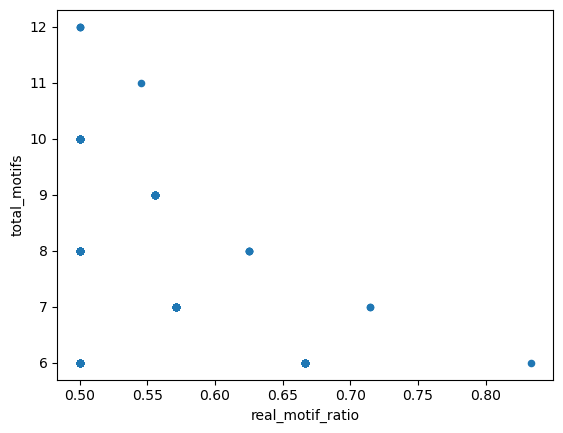

In [20]:
df.plot(kind='scatter',x='real_motif_ratio',y='total_motifs')
plt.show()

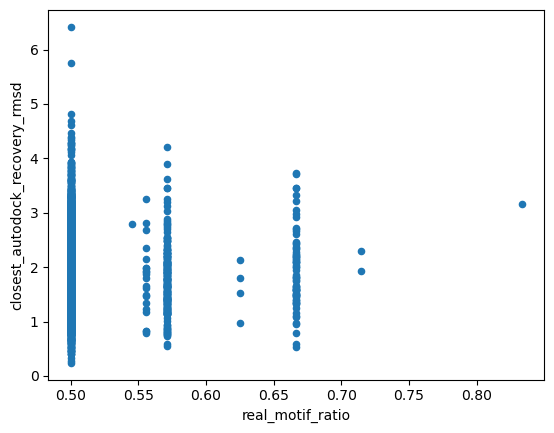

In [24]:
df.plot(kind='scatter',x='real_motif_ratio',y='closest_autodock_recovery_rmsd')
plt.show()

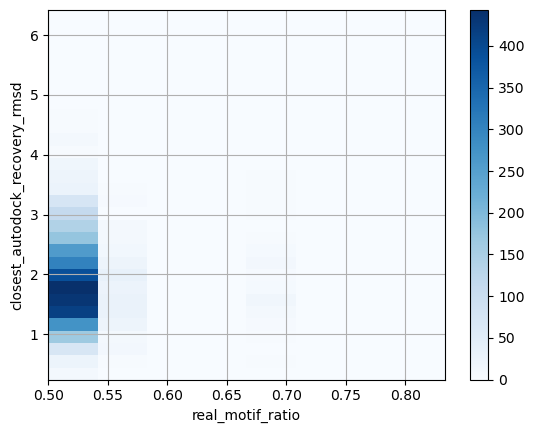

In [26]:
#Create heatmap of rmsds per system (n=85) between AutoDock and Rosetta Motifs
#Expanding x and y max to 10
#Using Blues color scale to allow for zeros to be white

x = df['real_motif_ratio']
y = df['closest_autodock_recovery_rmsd']

heatmap, xedges, yedges = np.histogram2d(x, y, bins=(8, 30))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.xlabel('real_motif_ratio')
plt.ylabel('closest_autodock_recovery_rmsd')

plt.imshow(heatmap.T, extent=extent, origin='lower', cmap='Blues', aspect='auto')

plt.colorbar()

plt.grid(True)
plt.show()

In [21]:
#df_sorted = df.sort_values(by='real_motif_ratio', ascending=False)
df_sorted = df.sort_values(by='closest_autodock_recovery_ddg', ascending=False)

#print(df_sorted.head(100)[['file','real_motif_ratio','total','closest_autodock_recovery_ddg']])
print(df_sorted)

                                                                                                                    file  \
3211     /scratch/abgvg9/discovery_results/top_1000_placement/8752/placements/7l1u_receptor_only_PV-006675981037_3_3.pdb   
2338     /scratch/abgvg9/discovery_results/top_1000_placement/6315/placements/7l1u_receptor_only_PV-006646813838_9_1.pdb   
30      /scratch/abgvg9/discovery_results/top_1000_placement/10092/placements/7l1u_receptor_only_PV-006692067786_8_4.pdb   
656     /scratch/abgvg9/discovery_results/top_1000_placement/11955/placements/7l1u_receptor_only_PV-006714597247_7_0.pdb   
1369      /scratch/abgvg9/discovery_results/top_1000_placement/350/placements/7l1u_receptor_only_PV-005578246991_5_1.pdb   
1412     /scratch/abgvg9/discovery_results/top_1000_placement/3621/placements/7l1u_receptor_only_PV-006614551298_9_2.pdb   
1880         /scratch/abgvg9/discovery_results/top_1000_placement/490/placements/7l1u_receptor_only_Z5000964557_10_1.pdb   
3406    

In [22]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)